In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import copy
from copy import deepcopy
from sklearn import decomposition
from sklearn import preprocessing
#from functions import *
import pickle
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\laeti\Anaconda3\envs\geo_env\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Importation des données

In [2]:
from pickle import *

In [3]:
f = open("x","rb")
data = load(f)
f.close()

In [4]:
data.shape

(67768, 16)

In [5]:
X = data.values # On prend les valeurs de data. 

In [6]:
X.shape

(67768, 16)

X a une dimension de (67768, 18)

In [7]:
names = data.index # names est égal aux index de data. 

In [8]:
features = data.columns # features est égal aux colonnes de data.

In [9]:
# Centrage et Réduction
# On centre et on réduit les données. 
std_scale = preprocessing.StandardScaler().fit(X)# Crée l'objet et calcule la moyenne et l'écart-type
X_scaled = std_scale.transform(X)# Transforme les données.

# Echantillonnage des données

"En statistique, un échantillon est un ensemble d'individus représentatifs d'une population. L'échantillonnage vise à obtenir une meilleure connaissance d'une ou plusieurs population(s) ou sous-populations(s) par l'étude d'un nombre d'échantillons jugé statistiquement représentatif. Le recours à un plan d'échantillonnage répond en général à une contrainte pratique (manque de temps, de place, évaluation destructive d'une production, coût financier…) interdisant l'étude exhaustive de la population."
[Source : https://fr.wikipedia.org/]

Dans notre cas, nous le faisons car nous avons des problèmes de mémoire lorsque l'on lance nos différents modèles. 

"Python Pandas DataFrame.sample(), la fonction génère un échantillon d’une ligne aléatoire ou d’un colonne d’un DataFrame. L’échantillon peut contenir plusieurs lignes ou colonnes."

1. n : est une valeur entière. Il représente le nombre aléatoire de lignes ou de colonnes à sélectionner dans le DataFrame.
2. replace : il s’agit d’une valeur booléenne. S’il est défini sur True, il retourne l’échantillon avec le remplacement des données.

3. random_state : il s’agit d’une fonction integer ou numpy.random.RandomState. S’il s’agit d’un entier, il retourne le même nombre de lignes ou de colonnes à chaque itération. Sinon, il retourne un objet numpy.random.RandomState.

4. axis : il s’agit d’un entier ou d’une chaîne. Il indique l’axe cible soit des lignes soit des colonnes. Ce peut être 0 ou index et 1 ou columns.

[Source : https://www.delftstack.com/]


On fait l'echantillonnage car au niveau du clustering nous avons eu du mal à faire tourner le programme avec toutes les données. 

In [10]:
df = data.sample(n=1000, replace=False, random_state= 1, axis=None) 

In [11]:
df.head()

distance_haversine  payment_installments  score  delai_de_livraison  \
107162          362.578359                   2.0    4.0                 1.0   
27137           758.286741                   5.0    5.0                 8.0   
88139           362.578359                   1.0    5.0                 4.0   
102245          362.578359                   1.0    3.0                 7.0   
66660           362.578359                   3.0    4.0                 5.0   

        mois_commande_le_plus_frequent  ratio_frais_de_port  \
107162                             8.0             0.063750   
27137                             10.0             0.629429   
88139                              3.0             0.273660   
102245                            12.0             0.515532   
66660                             10.0             0.261667   

        prix_depense_en_tout  nc_Books, CDs and other physical media  \
107162                136.16                                       0   
27137                 156.36                                       0   
88139                  54.64                                       0   
102245                201.49                                       0   
66660                  68.13                                       0   

        nc_Fashion, clothing and accessoires  nc_Flowers and gifts  \
107162                                     0                     0   
27137                                      0                     0   
88139                                      0                     0   
102245                                     0                     0   
66660                                      0                     0   

        nc_Groceries, food and drink  nc_Health and Beauty  \
107162                             0                     0   
27137                              0                     1   
88139                              0                     1   
102245                             0                     0   
66660                              0                     1   

        nc_Home and furniture  nc_Others  \
107162                      0          1   
27137                       0          0   
88139                       0          0   
102245                      1          0   
66660                       0          0   

        nc_Technology(including phones and computers)  \
107162                                              0   
27137                                               0   
88139                                               0   
102245                                              0   
66660                                               0   

        nc_Toys and baby equipment  
107162                           0  
27137                            0  
88139                            0  
102245                           0  
66660                            0

In [12]:
df.shape

(1000, 16)

On sélectionne les colonnes 

In [13]:
df.columns.tolist()

['distance_haversine',
 'payment_installments',
 'score',
 'delai_de_livraison',
 'mois_commande_le_plus_frequent',
 'ratio_frais_de_port',
 'prix_depense_en_tout',
 'nc_Books, CDs and other physical media',
 'nc_Fashion, clothing and accessoires',
 'nc_Flowers and gifts',
 'nc_Groceries, food and drink',
 'nc_Health and Beauty',
 'nc_Home and furniture',
 'nc_Others',
 'nc_Technology(including phones and computers)',
 'nc_Toys and baby equipment']

In [14]:
#col_numerics = list(df.select_dtypes(include = ['int64', 'float64']).columns)
#col_categories = list(df.select_dtypes(exclude = ['int64', 'float64']).columns)

In [15]:
data_echantillonne = df

In [16]:
data_echantillonne.shape

(1000, 16)

In [17]:
X_echantillonne = data_echantillonne.values

In [18]:
names_echantillonne = data_echantillonne.index

In [19]:
features_echantillonne = data_echantillonne.columns

In [20]:
# Centrage et Réduction
std_scale_echantillonne = preprocessing.StandardScaler().fit(X_echantillonne)# Crée l'objet et calcule la moyenne et l'écart-type
X_scaled_echantillonne = std_scale_echantillonne.transform(X_echantillonne)# Transforme les données.

# L'ACP

On fait l'ACP pour voir si on peut faire le clustering ou le K-means avec moins de variables. Le seuil d'inertie que nous souhaitons,avoir est de 95%

In [21]:
n_comp = 16 # On analyse 18 axes puisque c'est le minimum entre le nombre de variable et (n-1) individus

In [22]:
from scipy.cluster.hierarchy import dendrogram

Fonction pour tracer le cercle de corrélation: 

In [23]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(14,15))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        


Fonction pour projeter les individus

In [24]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(6,7))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

Fonction pour tracer les éboulis de valeurs propres

In [25]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100 #  renvoie un tableau numpy unidimensionnel qui contient les valeurs du pourcentage de variance expliquée par chacune des composantes sélectionnées.
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

Fonction pour tracer le dendogramme

In [26]:
def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.show()

In [27]:
#liste_colonne = data.columns.tolist()

In [28]:
#X = data_new.values

In [29]:
#X.shape

In [30]:
#names = data_new.index

In [31]:
#features =data_new.columns

In [32]:
'''# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)# Crée l'objet et calcule la moyenne et l'écart-type
X_scaled = std_scale.transform(X)# Transforme les données.'''

"# Centrage et Réduction\nstd_scale = preprocessing.StandardScaler().fit(X)# Crée l'objet et calcule la moyenne et l'écart-type\nX_scaled = std_scale.transform(X)# Transforme les données."

In [33]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=16)

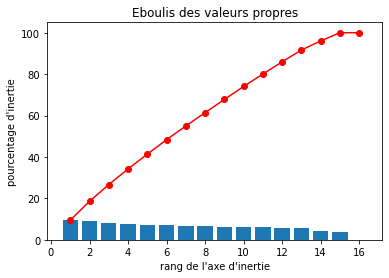

In [34]:
# Eboulis des valeurs propres
display_scree_plot(pca)

95% utilisent presque tous les axes. Donc nous n'avons pas besoin de faire une ACP. Mais comme dans la vidéo d'intruction du projet il nous est demandé de le faire, nous la faisons quand même.
On choisit une inertie de 60% soit 8 variables

In [35]:
print(pca.components_)

[[-2.61510433e-02  3.59714272e-01 -6.26069914e-02  4.20471027e-02
   6.68473425e-02 -5.24862711e-01  4.58822304e-01 -7.35048639e-02
  -3.22006451e-02  1.89424011e-01 -9.11847090e-02 -2.65651218e-02
   3.31422929e-01  3.38818602e-02 -4.59511679e-01  1.68834445e-02]
 [ 3.02412027e-01  3.45123535e-02 -3.31450411e-01  4.73369638e-01
  -9.17777684e-02  2.70696509e-01  2.24573657e-02 -3.17612047e-02
  -7.15310748e-02 -8.53243201e-02 -5.28509380e-02 -4.02601692e-01
   4.98803437e-01 -1.69432055e-01  1.49931641e-01 -1.13731885e-01]
 [ 3.44785837e-01  7.98858305e-02 -2.51202744e-01  3.94810006e-01
  -1.18542656e-01 -1.56029045e-01  2.94530146e-01 -4.38524810e-02
  -2.38273206e-02  2.15509867e-01 -1.03961309e-01  1.49147202e-01
  -5.75218494e-01  1.96659550e-01  2.78826463e-01  3.65263360e-02]
 [ 2.31097723e-01  9.50398101e-02 -3.85099970e-02  1.82763002e-01
   3.86845172e-02  1.21858700e-01 -1.29161098e-01 -1.58710741e-02
  -4.09175866e-02 -1.04500689e-01 -4.24689041e-02  7.36757409e-01
   5.51

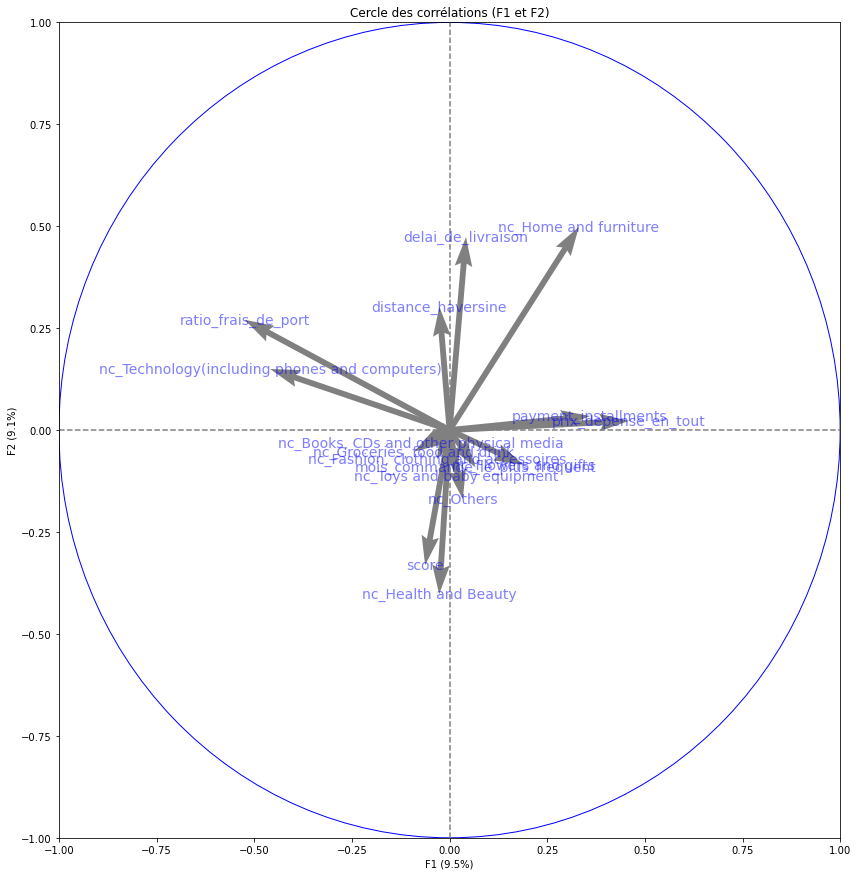

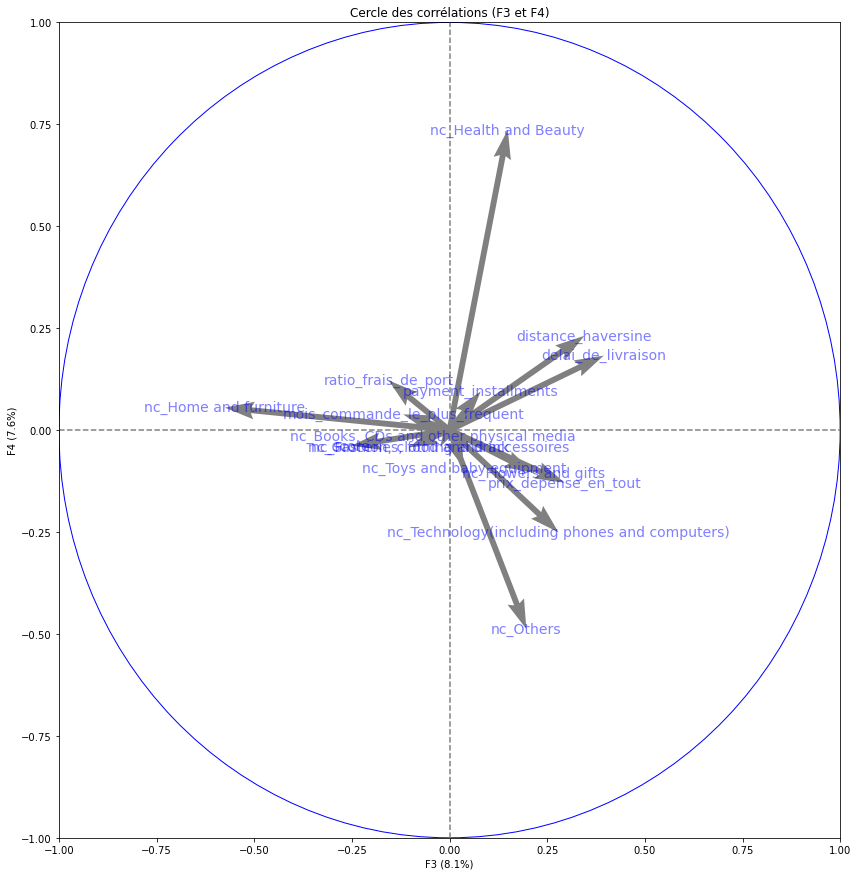

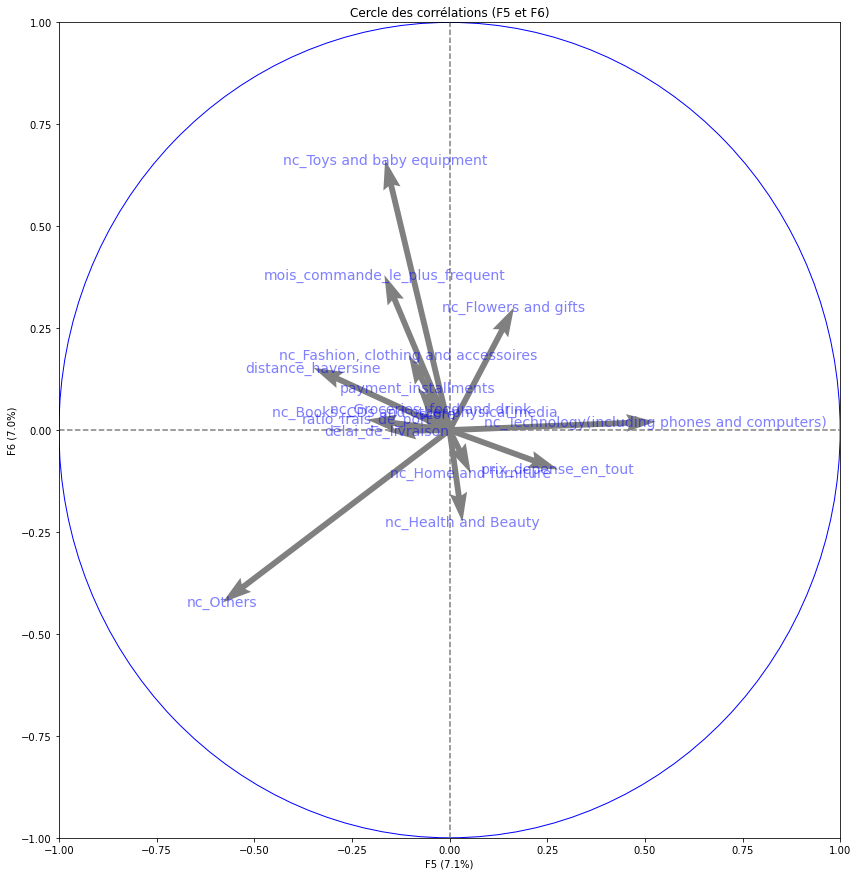

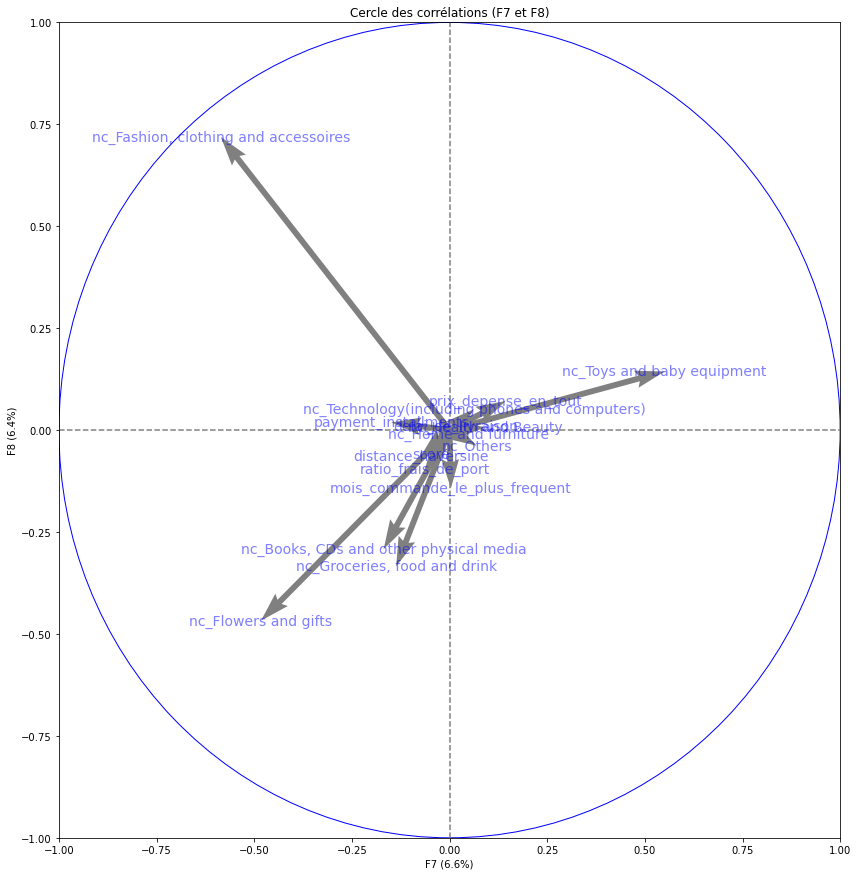

In [36]:
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5),(6,7)], labels = np.array(features))

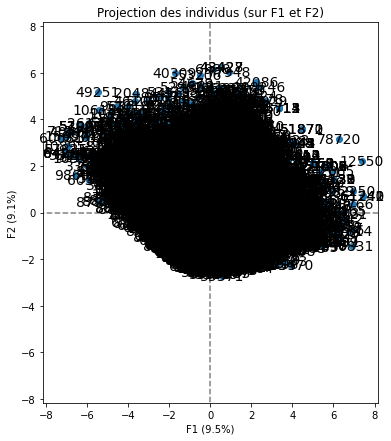

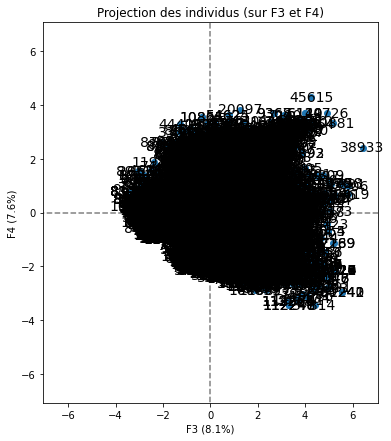

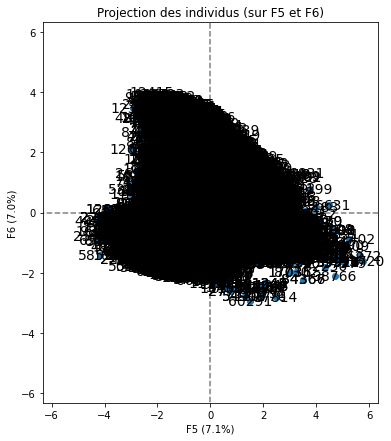

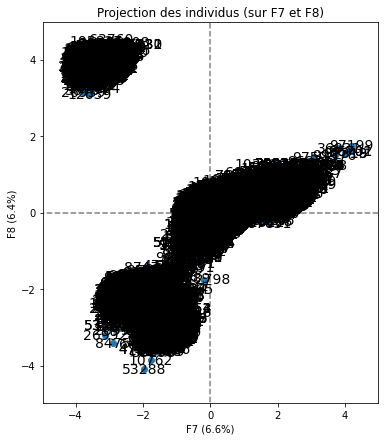

In [37]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5),(6,7)], labels = np.array(names))
plt.show()

# Clustering  hiérarchique

On fait le clustering avec l'échantillon de données

In [38]:
# Clustering hiérarchique
Z_echantillonne = linkage(X_scaled_echantillonne, 'ward')

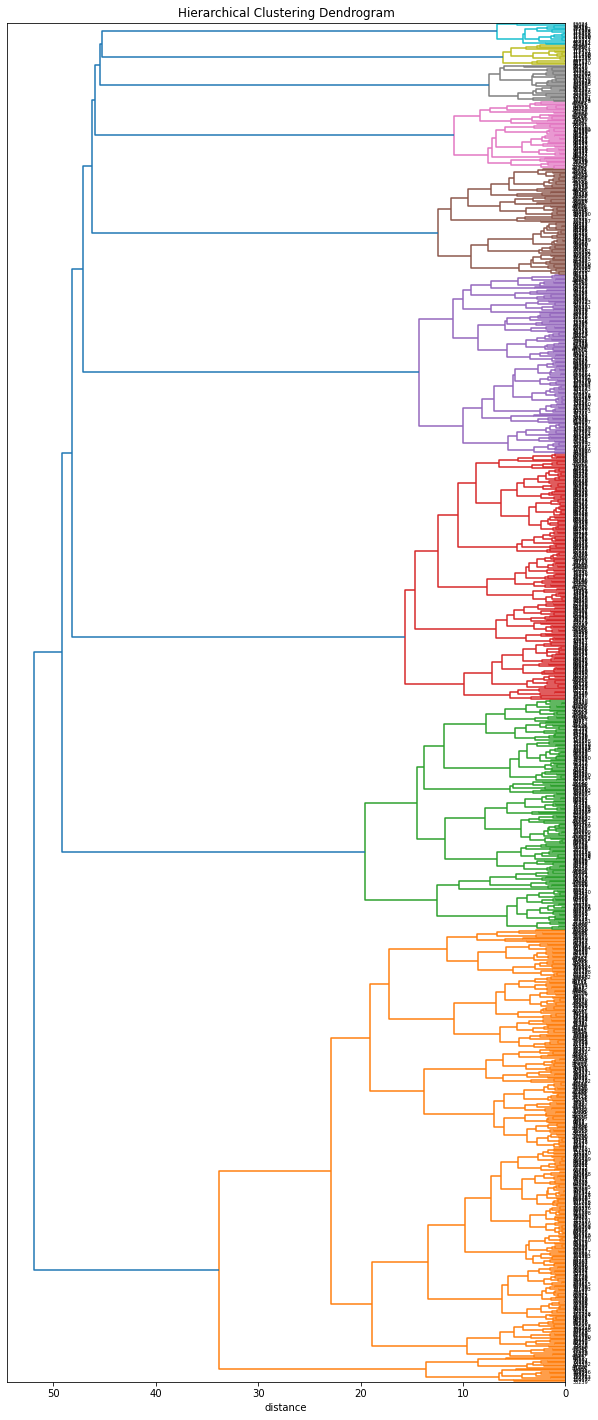

In [39]:
# Affichage du dendrogramme
plot_dendrogram(Z_echantillonne, names_echantillonne)

In [40]:
# Coupage du dendrogramme en 10 clusters
clusters_echantillonne = fcluster(Z_echantillonne, 10, criterion='maxclust')

In [41]:
clusters_echantillonne

array([ 5,  4,  4,  2,  4,  2,  2,  5,  2,  4,  6,  2,  2,  4,  4,  2,  2,
        4,  2,  2,  7,  4,  2,  7,  2,  2,  2,  4,  5,  8,  5,  3,  2, 10,
        5,  4,  2,  7,  8,  9,  6,  3,  2,  4,  4,  2,  3,  6,  2,  2,  2,
        4,  3,  5,  2,  1,  7,  2,  2,  5,  7,  2,  4,  3,  2,  2,  5,  2,
        6,  8,  3,  5,  6,  2,  2,  2,  2,  2,  7,  2,  2,  2,  2,  4,  4,
        4,  2,  3,  2,  8,  6,  3,  2,  4,  2,  4, 10,  2,  5,  2,  3,  2,
        4,  4,  3,  2,  2,  4,  2,  2,  2,  2,  5,  6,  5,  5,  3,  6,  5,
        1,  2,  2,  2,  8,  3,  7,  5,  6,  5,  7,  2,  2,  2,  3,  2,  3,
        4,  4,  4,  2,  3,  3,  2,  3,  7,  3,  2,  3,  5,  2,  3,  2,  2,
        2,  5,  2,  6,  2,  3,  7,  4,  9,  2,  2,  2,  3,  4,  3,  4,  3,
        2,  2,  2,  4,  4,  4,  3,  2,  2,  3,  5,  4,  5,  2,  5,  5,  2,
        7,  3,  5,  2,  5,  4,  8,  3,  4,  6,  3,  4,  2,  5,  5,  5,  5,
        2,  4,  4,  3,  3,  5,  3,  2,  5,  2,  2,  4,  6,  2,  4,  2,  5,
        3,  9,  5,  2,  6

In [133]:
data_echantillonne['distance_haversine'].max()

1079.8022450441845

In [42]:
data_echantillonne['Clusters_echantillonne'] = clusters_echantillonne

In [43]:
data_echantillonne_clusters_1= data_echantillonne[data_echantillonne['Clusters_echantillonne'] == 1]
data_echantillonne_clusters_1 

distance_haversine  payment_installments  score  delai_de_livraison  \
74497           362.578359                   2.0    5.0                10.0   
72224           362.578359                   1.0    4.0                11.0   
55197           561.233868                   1.0    5.0                16.0   
40316           691.014624                   1.0    4.5                19.0   
8057           1078.477129                   1.0    3.0                24.0   
106492          362.578359                   2.0    5.0                 3.0   
70804           362.578359                   1.0    5.0                 8.0   
71942           362.578359                   1.0    2.5                 7.0   
103592          362.578359                   2.0    3.5                14.0   
97242           362.578359                   1.0    5.0                 6.0   
76002           362.578359                   1.0    5.0                 5.0   
40665           691.014624                   1.0    5.0                 6.0   
112753          362.578359                   1.0    5.0                 9.0   
33239           200.609620                   5.0    5.0                 6.0   
11917           990.794826                   4.0    5.0                10.0   
69431           362.578359                   1.0    4.0                21.0   
108046          362.578359                   2.0    5.0                15.0   
78864           362.578359                   4.0    5.0                 6.0   

        mois_commande_le_plus_frequent  ratio_frais_de_port  \
74497                              6.0             0.303924   
72224                              4.0             0.041199   
55197                             10.0             0.036915   
40316                              4.0             0.066226   
8057                              11.0             0.122443   
106492                             1.0             0.039762   
70804                              7.0             0.085103   
71942                              2.0             0.069184   
103592                             8.0             0.030467   
97242                              8.0             0.124033   
76002                             11.0             0.167703   
40665                             10.0             0.281436   
112753                             3.0             0.057453   
33239                              6.0             0.031929   
11917                              8.0             0.087837   
69431                              1.0             0.035188   
108046                             5.0             0.064000   
78864                              5.0             0.061504   

        prix_depense_en_tout  nc_Books, CDs and other physical media  \
74497                 559.24                                       0   
72224                 972.48                                       0   
55197                1714.02                                       0   
40316                 944.57                                       0   
8057                 1387.34                                       0   
106492                839.40                                       0   
70804                 958.84                                       0   
71942                1186.58                                       0   
103592               1102.60                                       0   
97242                 719.37                                       0   
76002                 548.12                                       0   
40665                 706.84                                       0   
112753                793.09                                       0   
33239                 907.86                                       0   
11917                1066.08                                       0   
69431                1083.20                                       0   
108046                457.52                                       0   
78864       

In [44]:
data_echantillonne_clusters_1.describe()

distance_haversine  payment_installments      score  \
count           18.000000             18.000000  18.000000   
mean           475.782500              1.777778   4.527778   
std            237.379372              1.262843   0.794692   
min            200.609620              1.000000   2.500000   
25%            362.578359              1.000000   4.125000   
50%            362.578359              1.000000   5.000000   
75%            511.569991              2.000000   5.000000   
max           1078.477129              5.000000   5.000000   

       delai_de_livraison  mois_commande_le_plus_frequent  \
count           18.000000                       18.000000   
mean            10.888889                        6.111111   
std              6.008708                        3.251948   
min              3.000000                        1.000000   
25%              6.000000                        4.000000   
50%              9.500000                        6.000000   
75%             14.750000                        8.000000   
max             24.000000                       11.000000   

       ratio_frais_de_port  prix_depense_en_tout  \
count            18.000000             18.000000   
mean              0.094795            918.965556   
std               0.080974            316.506542   
min               0.030467            457.520000   
25%               0.040121            709.972500   
50%               0.065113            926.215000   
75%               0.113792           1078.920000   
max               0.303924           1714.020000   

       nc_Books, CDs and other physical media  \
count                                    18.0   
mean                                      0.0   
std                                       0.0   
min                                       0.0   
25%                                       0.0   
50%                                       0.0   
75%                                       0.0   
max                                       0.0   

       nc_Fashion, clothing and accessoires  nc_Flowers and gifts  \
count                                  18.0                  18.0   
mean                                    0.0                   0.0   
std                                     0.0                   0.0   
min                                     0.0                   0.0   
25%                                     0.0                   0.0   
50%                                     0.0                   0.0   
75%                                     0.0                   0.0   
max                                     0.0                   0.0   

       nc_Groceries, food and drink  nc_Health and Beauty  \
count                          18.0             18.000000   
mean                            0.0              0.055556   
std                             0.0              0.235702   
min                             0.0              0.000000   
25%                             0.0              0.000000   
50%                             0.0              0.000000   
75%                             0.0              0.000000   
max                             0.0              1.000000   

       nc_Home and furniture  nc_Others  \
count              18.000000  18.000000   
mean                0.388889   0.055556   
std                 0.501631   0.235702   
min                 0.000000   0.000000   
25%                 0.000000   0.000000   
50%                 0.000000   0.000000   
75%                 1.000000   0.000000   
max                 1.000000   1.000000   

       nc_Technology(including phones and computers)  \
count                                      18.000000   
mean                                        0.444444   
std                                         0.511310   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                

Le cluster 1 est constitué de clients qui payent en général en une fois ou deux fois. Ils sont en général satisfaits. Le score qu'ils donnent à Olist est en général de 4 ou 5.  Ils commandent en général en janvier, en avril, en juin et en août.   Le ratio entre les frais de port et le prix est en général inférieur à 0.304. Ils dépensent en moyenne 918.97. La médiane des dépense est à 926.215 et le troisième quartile à 1078.92. Ils achètent des produits   des produits d'hygiène et de beauté, des articles pour la maison et les fournitures maisons, autres, les nouvelles technologies et l'équipement de bébé. Ils sont situés en général à la moitié du chemin maximal de Olist. Les délais de livraison sont compris entre 6 et 15 jours en général.  

In [45]:
data_echantillonne_clusters_2= data_echantillonne[data_echantillonne['Clusters_echantillonne'] == 2]
data_echantillonne_clusters_2.describe() 

distance_haversine  payment_installments       score  \
count          315.000000            315.000000  315.000000   
mean           548.467665              2.038095    4.453968   
std            256.647028              1.332522    0.781225   
min            200.609620              1.000000    2.000000   
25%            362.578359              1.000000    4.000000   
50%            362.578359              1.000000    5.000000   
75%            812.356335              3.000000    5.000000   
max           1079.802245              5.000000    5.000000   

       delai_de_livraison  mois_commande_le_plus_frequent  \
count          315.000000                      315.000000   
mean            10.660053                        6.095238   
std              7.430694                        3.210821   
min             -1.000000                        1.000000   
25%              6.000000                        4.000000   
50%              9.000000                        6.000000   
75%             14.000000                        8.000000   
max             44.000000                       12.000000   

       ratio_frais_de_port  prix_depense_en_tout  \
count           315.000000            315.000000   
mean              0.298616            133.826159   
std               0.205503             89.971332   
min               0.000000             22.720000   
25%               0.157201             66.955000   
50%               0.258524            106.780000   
75%               0.372806            174.290000   
max               1.466667            511.370000   

       nc_Books, CDs and other physical media  \
count                                   315.0   
mean                                      0.0   
std                                       0.0   
min                                       0.0   
25%                                       0.0   
50%                                       0.0   
75%                                       0.0   
max                                       0.0   

       nc_Fashion, clothing and accessoires  nc_Flowers and gifts  \
count                                 315.0                 315.0   
mean                                    0.0                   0.0   
std                                     0.0                   0.0   
min                                     0.0                   0.0   
25%                                     0.0                   0.0   
50%                                     0.0                   0.0   
75%                                     0.0                   0.0   
max                                     0.0                   0.0   

       nc_Groceries, food and drink  nc_Health and Beauty  \
count                         315.0            315.000000   
mean                            0.0              0.012698   
std                             0.0              0.112148   
min                             0.0              0.000000   
25%                             0.0              0.000000   
50%                             0.0              0.000000   
75%                             0.0              0.000000   
max                             0.0              1.000000   

       nc_Home and furniture  nc_Others  \
count             315.000000      315.0   
mean                0.987302        0.0   
std                 0.112148        0.0   
min                 0.000000        0.0   
25%                 1.000000        0.0   
50%                 1.000000        0.0   
75%                 1.000000        0.0   
max                 1.000000        0.0   

       nc_Technology(including phones and computers)  \
count                                          315.0   
mean                                             0.0   
std                                              0.0   
min                                              0.0   
25%                                              0.0   
50%                                              0.0   
75%                       

Le cluster 2 est constitué de clients payant entre une et 3 fois environ en général. Ils sont plutôt très satisfait et note Olist à 5 en général. Le delai de livraison est pour la majorité entre 6 jours et 14 jours.  Il commande au mois de janvier, d'avril, de juin et d'aout. Le ratio des frais de port est en moyenne de 0.373. Ils dépensent en tout 22.72 au minimum sinon, 66.95 pour 25% et moins. 75% dépensent 174.29 ou moins. Ils commandent  des produits d'hygiène et de beauté, des produits de la maison et des fournitures maison. La distance Haversine est au dessus de la moitié de la distance maximale.   

In [46]:
data_echantillonne_clusters_3= data_echantillonne[data_echantillonne['Clusters_echantillonne'] == 3]
data_echantillonne_clusters_3.describe()

distance_haversine  payment_installments       score  \
count          169.000000            169.000000  169.000000   
mean           499.603985              1.745562    4.502959   
std            225.786774              1.139285    0.815579   
min            200.609620              1.000000    2.000000   
25%            362.578359              1.000000    4.000000   
50%            362.578359              1.000000    5.000000   
75%            691.014624              2.000000    5.000000   
max           1079.802245              5.000000    5.000000   

       delai_de_livraison  mois_commande_le_plus_frequent  \
count          169.000000                      169.000000   
mean             9.244576                        6.047337   
std              5.296196                        3.404847   
min              1.000000                        1.000000   
25%              6.000000                        3.000000   
50%              8.000000                        6.000000   
75%             12.000000                        9.000000   
max             29.000000                       12.000000   

       ratio_frais_de_port  prix_depense_en_tout  \
count           169.000000            169.000000   
mean              0.422441            100.204083   
std               0.344989             86.225038   
min               0.041571             16.890000   
25%               0.181500             37.530000   
50%               0.304755             71.800000   
75%               0.595477            144.170000   
max               2.689482            486.500000   

       nc_Books, CDs and other physical media  \
count                                   169.0   
mean                                      0.0   
std                                       0.0   
min                                       0.0   
25%                                       0.0   
50%                                       0.0   
75%                                       0.0   
max                                       0.0   

       nc_Fashion, clothing and accessoires  nc_Flowers and gifts  \
count                                 169.0                 169.0   
mean                                    0.0                   0.0   
std                                     0.0                   0.0   
min                                     0.0                   0.0   
25%                                     0.0                   0.0   
50%                                     0.0                   0.0   
75%                                     0.0                   0.0   
max                                     0.0                   0.0   

       nc_Groceries, food and drink  nc_Health and Beauty  \
count                         169.0                 169.0   
mean                            0.0                   0.0   
std                             0.0                   0.0   
min                             0.0                   0.0   
25%                             0.0                   0.0   
50%                             0.0                   0.0   
75%                             0.0                   0.0   
max                             0.0                   0.0   

       nc_Home and furniture  nc_Others  \
count                  169.0      169.0   
mean                     0.0        0.0   
std                      0.0        0.0   
min                      0.0        0.0   
25%                      0.0        0.0   
50%                      0.0        0.0   
75%                      0.0        0.0   
max                      0.0        0.0   

       nc_Technology(including phones and computers)  \
count                                          169.0   
mean                                             1.0   
std                                              0.0   
min                                              1.0   
25%                                              1.0   
50%                                              1.0   
75%                       

Les clients du clusters 3 payent entre une et 2 fois en majorité. Ils sont plutôt très satisfait et note Olist entre 5 en général. Le délai de livraison est entre 6 et 12 jours en général.  Ils commandent en général entre le mois de janvier, le mois mars, juin et le mois de septembre.  Le ratio entre les frais de port et le prix depensé est de 0.4224 en moyenne. Ils dépensent au minimum 16.89, 25% dépensent 37.53 ou moins et 75% dépensent 144.17 ou moins en général. Ils achètent des  des nouvelles technologies.    

In [47]:
data_echantillonne_clusters_4= data_echantillonne[data_echantillonne['Clusters_echantillonne'] == 4]
data_echantillonne_clusters_4.describe()

distance_haversine  payment_installments       score  \
count          181.000000            181.000000  181.000000   
mean           511.772265              1.900552    4.577348   
std            234.865050              1.206947    0.767091   
min            200.609620              1.000000    2.000000   
25%            362.578359              1.000000    4.000000   
50%            362.578359              1.000000    5.000000   
75%            691.014624              3.000000    5.000000   
max           1079.802245              5.000000    5.000000   

       delai_de_livraison  mois_commande_le_plus_frequent  \
count          181.000000                      181.000000   
mean             8.205801                        6.419890   
std              4.380764                        3.224979   
min              0.000000                        1.000000   
25%              5.000000                        4.000000   
50%              8.000000                        7.000000   
75%             11.000000                        8.000000   
max             21.000000                       12.000000   

       ratio_frais_de_port  prix_depense_en_tout  \
count           181.000000            181.000000   
mean              0.268936            129.301326   
std               0.193235             87.369585   
min               0.030419             20.870000   
25%               0.133731             68.130000   
50%               0.224923            100.340000   
75%               0.352705            159.220000   
max               1.402247            531.170000   

       nc_Books, CDs and other physical media  \
count                                   181.0   
mean                                      0.0   
std                                       0.0   
min                                       0.0   
25%                                       0.0   
50%                                       0.0   
75%                                       0.0   
max                                       0.0   

       nc_Fashion, clothing and accessoires  nc_Flowers and gifts  \
count                                 181.0                 181.0   
mean                                    0.0                   0.0   
std                                     0.0                   0.0   
min                                     0.0                   0.0   
25%                                     0.0                   0.0   
50%                                     0.0                   0.0   
75%                                     0.0                   0.0   
max                                     0.0                   0.0   

       nc_Groceries, food and drink  nc_Health and Beauty  \
count                         181.0                 181.0   
mean                            0.0                   1.0   
std                             0.0                   0.0   
min                             0.0                   1.0   
25%                             0.0                   1.0   
50%                             0.0                   1.0   
75%                             0.0                   1.0   
max                             0.0                   1.0   

       nc_Home and furniture  nc_Others  \
count                  181.0      181.0   
mean                     0.0        0.0   
std                      0.0        0.0   
min                      0.0        0.0   
25%                      0.0        0.0   
50%                      0.0        0.0   
75%                      0.0        0.0   
max                      0.0        0.0   

       nc_Technology(including phones and computers)  \
count                                          181.0   
mean                                             0.0   
std                                              0.0   
min                                              0.0   
25%                                              0.0   
50%                                              0.0   
75%                       

Le cluster 4, correspond à des clients qui payent en général entre 1 ou 3 fois en général.  Ils sont plutôt très satisfait d'Olist, qu'ils notent entre  5 en général. Le délai de livraison en entre 0 et 11 jours en général. Ils commandent en général au minimum en janvier, puis en avril, en juillet et en août. Le ratio_frais_de_port est de 0.26 en moyenne. Ils dépensent au minimum  20.87 , 25% dépensent 68.13 et moins, 50% 100.34 et moins et 75% 159.22 et moins. Ils achètent en les articles de la catégories 'hygiène et beauté'.

In [48]:
data_echantillonne_clusters_5= data_echantillonne[data_echantillonne['Clusters_echantillonne'] == 5]
data_echantillonne_clusters_5.describe()

distance_haversine  payment_installments       score  \
count          132.000000            132.000000  132.000000   
mean           501.907954              1.803030    4.444444   
std            239.155627              1.213407    0.773464   
min            200.609620              1.000000    2.000000   
25%            362.578359              1.000000    4.000000   
50%            362.578359              1.000000    5.000000   
75%            691.014624              2.000000    5.000000   
max           1079.802245              5.000000    5.000000   

       delai_de_livraison  mois_commande_le_plus_frequent  \
count           132.00000                      132.000000   
mean              9.40404                        5.871212   
std               5.82630                        3.107256   
min               0.00000                        1.000000   
25%               5.00000                        4.000000   
50%               8.00000                        6.000000   
75%              12.00000                        8.000000   
max              32.00000                       12.000000   

       ratio_frais_de_port  prix_depense_en_tout  \
count           132.000000            132.000000   
mean              0.297947            118.695833   
std               0.220715             93.454765   
min               0.036828             15.380000   
25%               0.151609             60.675000   
50%               0.243321             90.470000   
75%               0.358732            142.847500   
max               1.259383            626.480000   

       nc_Books, CDs and other physical media  \
count                                   132.0   
mean                                      0.0   
std                                       0.0   
min                                       0.0   
25%                                       0.0   
50%                                       0.0   
75%                                       0.0   
max                                       0.0   

       nc_Fashion, clothing and accessoires  nc_Flowers and gifts  \
count                                 132.0                 132.0   
mean                                    0.0                   0.0   
std                                     0.0                   0.0   
min                                     0.0                   0.0   
25%                                     0.0                   0.0   
50%                                     0.0                   0.0   
75%                                     0.0                   0.0   
max                                     0.0                   0.0   

       nc_Groceries, food and drink  nc_Health and Beauty  \
count                         132.0                 132.0   
mean                            0.0                   0.0   
std                             0.0                   0.0   
min                             0.0                   0.0   
25%                             0.0                   0.0   
50%                             0.0                   0.0   
75%                             0.0                   0.0   
max                             0.0                   0.0   

       nc_Home and furniture  nc_Others  \
count                  132.0      132.0   
mean                     0.0        1.0   
std                      0.0        0.0   
min                      0.0        1.0   
25%                      0.0        1.0   
50%                      0.0        1.0   
75%                      0.0        1.0   
max                      0.0        1.0   

       nc_Technology(including phones and computers)  \
count                                          132.0   
mean                                             0.0   
std                                              0.0   
min                                              0.0   
25%                                              0.0   
50%                                              0.0   
75%                       

Le cluster 5, correspond à des clients qui payent en général entre 1 et 2 fois .  Ils sont plutôt très satisfait d'Olist, qu'ils notent entre 4 et 5 en général avec un minimum à 1. Le délai de livraison est entre 5 et 12 jours. Ils commandent en général au minimum en janvier, puis en avril ,en juin et en août. Le ratio_frais_de_port est de 0.298 en moyenne. Ils dépensent au minimum  15.38 , 25% dépensent 60.675 et moins, 50% 90.47 et moins et 75% 142.85 et moins. Ils achètent dans la catégories autres. Leur distance à Olist est juste un peu au dessus de la moitié de la distance maximale à Olist en général. 

In [49]:
data_echantillonne_clusters_6= data_echantillonne[data_echantillonne['Clusters_echantillonne'] == 6]
data_echantillonne_clusters_6.describe()

distance_haversine  payment_installments      score  \
count           78.000000             78.000000  78.000000   
mean           530.900462              1.974359   4.461538   
std            236.857643              1.348153   0.878196   
min            200.609620              1.000000   2.000000   
25%            362.578359              1.000000   4.000000   
50%            362.578359              1.000000   5.000000   
75%            691.014624              3.000000   5.000000   
max           1079.802245              5.000000   5.000000   

       delai_de_livraison  mois_commande_le_plus_frequent  \
count           78.000000                       78.000000   
mean             9.051282                        7.128205   
std              6.159983                        3.025257   
min              1.000000                        1.000000   
25%              4.000000                        5.000000   
50%              8.000000                        7.000000   
75%             12.000000                        9.000000   
max             29.000000                       12.000000   

       ratio_frais_de_port  prix_depense_en_tout  \
count            78.000000             78.000000   
mean              0.277212            112.876538   
std               0.217464             63.676129   
min               0.063316             31.230000   
25%               0.140000             66.760000   
50%               0.201916             94.380000   
75%               0.343738            154.195000   
max               1.402308            291.470000   

       nc_Books, CDs and other physical media  \
count                                    78.0   
mean                                      0.0   
std                                       0.0   
min                                       0.0   
25%                                       0.0   
50%                                       0.0   
75%                                       0.0   
max                                       0.0   

       nc_Fashion, clothing and accessoires  nc_Flowers and gifts  \
count                                  78.0                  78.0   
mean                                    0.0                   0.0   
std                                     0.0                   0.0   
min                                     0.0                   0.0   
25%                                     0.0                   0.0   
50%                                     0.0                   0.0   
75%                                     0.0                   0.0   
max                                     0.0                   0.0   

       nc_Groceries, food and drink  nc_Health and Beauty  \
count                          78.0                  78.0   
mean                            0.0                   0.0   
std                             0.0                   0.0   
min                             0.0                   0.0   
25%                             0.0                   0.0   
50%                             0.0                   0.0   
75%                             0.0                   0.0   
max                             0.0                   0.0   

       nc_Home and furniture  nc_Others  \
count                   78.0       78.0   
mean                     0.0        0.0   
std                      0.0        0.0   
min                      0.0        0.0   
25%                      0.0        0.0   
50%                      0.0        0.0   
75%                      0.0        0.0   
max                      0.0        0.0   

       nc_Technology(including phones and computers)  \
count                                           78.0   
mean                                             0.0   
std                                              0.0   
min                                              0.0   
25%                                              0.0   
50%                                              0.0   
75%                                

Le cluster 6, correspond à des clients qui payent en général entre 1 et 3 fois en général.  Ils sont plutôt très satisfait d'Olist, qu'ils notent entre 4 et 5 en général avec un minimum à 2. Le délai de livraison en entre 4 et 12 jours en général. Ils commandent en général au minimum en janvier, puis en mai, en juillet et en septembre. Le ratio_frais_de_port est de 0.277 en moyenne. Ils dépensent au minimum  31.23 , 25% dépensent 66.76 et moins, 50% 94.38 et moins et 75% , 154.195 et moins. Ils achètent les jeux et l'équipement de bébé.

In [50]:
data_echantillonne_clusters_7= data_echantillonne[data_echantillonne['Clusters_echantillonne'] == 7]
data_echantillonne_clusters_7.describe()

distance_haversine  payment_installments      score  \
count           49.000000             49.000000  49.000000   
mean           489.807446              1.877551   4.336735   
std            232.471154              1.317078   0.825301   
min            200.609620              1.000000   2.000000   
25%            362.578359              1.000000   4.000000   
50%            362.578359              1.000000   5.000000   
75%            691.014624              2.000000   5.000000   
max           1079.802245              5.000000   5.000000   

       delai_de_livraison  mois_commande_le_plus_frequent  \
count           49.000000                       49.000000   
mean            10.173469                        6.346939   
std              7.817949                        3.172479   
min              0.000000                        1.000000   
25%              5.000000                        4.000000   
50%              8.000000                        6.000000   
75%             15.000000                        8.000000   
max             41.000000                       12.000000   

       ratio_frais_de_port  prix_depense_en_tout  \
count            49.000000             49.000000   
mean              0.204574            149.964286   
std               0.187328            131.146976   
min               0.000000             15.380000   
25%               0.083368             88.200000   
50%               0.134364            117.790000   
75%               0.239103            175.160000   
max               0.924906            838.450000   

       nc_Books, CDs and other physical media  \
count                                    49.0   
mean                                      0.0   
std                                       0.0   
min                                       0.0   
25%                                       0.0   
50%                                       0.0   
75%                                       0.0   
max                                       0.0   

       nc_Fashion, clothing and accessoires  nc_Flowers and gifts  \
count                                  49.0                  49.0   
mean                                    0.0                   1.0   
std                                     0.0                   0.0   
min                                     0.0                   1.0   
25%                                     0.0                   1.0   
50%                                     0.0                   1.0   
75%                                     0.0                   1.0   
max                                     0.0                   1.0   

       nc_Groceries, food and drink  nc_Health and Beauty  \
count                          49.0                  49.0   
mean                            0.0                   0.0   
std                             0.0                   0.0   
min                             0.0                   0.0   
25%                             0.0                   0.0   
50%                             0.0                   0.0   
75%                             0.0                   0.0   
max                             0.0                   0.0   

       nc_Home and furniture  nc_Others  \
count                   49.0       49.0   
mean                     0.0        0.0   
std                      0.0        0.0   
min                      0.0        0.0   
25%                      0.0        0.0   
50%                      0.0        0.0   
75%                      0.0        0.0   
max                      0.0        0.0   

       nc_Technology(including phones and computers)  \
count                                           49.0   
mean                                             0.0   
std                                              0.0   
min                                              0.0   
25%                                              0.0   
50%                                              0.0   
75%                                

Le cluster 7, correspond à des clients qui payent en général  1 et 2 fois .  Ils sont plutôt très satisfait d'Olist, qu'ils notent entre 4 et 5 en général avec un minimum à 2. Le délai de livraison est entre 5 et 15 jours en général. Ils commandent en général au minimum en janvier, puis en avril en juin et en août. Le ratio_frais_de_port est de 0.205 en moyenne. Ils dépensent au minimum  15.38 , 25% dépensent 88.2 et moins, 50% 117.79 et moins et 75% 175.16 et moins. Ils achètent les fleurs et les cadeaux.  La distance Haversine est un peu plus de la moitié de la distance maximale entre Olist et une ville, en général. 

In [51]:
data_echantillonne_clusters_8= data_echantillonne[data_echantillonne['Clusters_echantillonne'] == 8]
data_echantillonne_clusters_8.describe()

distance_haversine  payment_installments      score  \
count           27.000000             27.000000  27.000000   
mean           517.993925              2.259259   4.814815   
std            256.748878              1.483048   0.483341   
min            200.609620              1.000000   3.000000   
25%            362.578359              1.000000   5.000000   
50%            362.578359              2.000000   5.000000   
75%            724.650683              3.500000   5.000000   
max           1079.802245              5.000000   5.000000   

       delai_de_livraison  mois_commande_le_plus_frequent  \
count           27.000000                       27.000000   
mean             8.518519                        6.222222   
std              5.549569                        2.846500   
min             -1.000000                        1.000000   
25%              6.000000                        4.000000   
50%              7.000000                        7.000000   
75%             10.500000                        8.000000   
max             25.000000                       12.000000   

       ratio_frais_de_port  prix_depense_en_tout  \
count            27.000000             27.000000   
mean              0.239455             99.638519   
std               0.132790             60.285307   
min               0.081764             37.770000   
25%               0.132175             61.405000   
50%               0.211899             77.720000   
75%               0.279079            113.225000   
max               0.552882            303.020000   

       nc_Books, CDs and other physical media  \
count                                    27.0   
mean                                      0.0   
std                                       0.0   
min                                       0.0   
25%                                       0.0   
50%                                       0.0   
75%                                       0.0   
max                                       0.0   

       nc_Fashion, clothing and accessoires  nc_Flowers and gifts  \
count                                  27.0                  27.0   
mean                                    1.0                   0.0   
std                                     0.0                   0.0   
min                                     1.0                   0.0   
25%                                     1.0                   0.0   
50%                                     1.0                   0.0   
75%                                     1.0                   0.0   
max                                     1.0                   0.0   

       nc_Groceries, food and drink  nc_Health and Beauty  \
count                          27.0                  27.0   
mean                            0.0                   0.0   
std                             0.0                   0.0   
min                             0.0                   0.0   
25%                             0.0                   0.0   
50%                             0.0                   0.0   
75%                             0.0                   0.0   
max                             0.0                   0.0   

       nc_Home and furniture  nc_Others  \
count                   27.0       27.0   
mean                     0.0        0.0   
std                      0.0        0.0   
min                      0.0        0.0   
25%                      0.0        0.0   
50%                      0.0        0.0   
75%                      0.0        0.0   
max                      0.0        0.0   

       nc_Technology(including phones and computers)  \
count                                           27.0   
mean                                             0.0   
std                                              0.0   
min                                              0.0   
25%                                              0.0   
50%                                              0.0   
75%                                

Le cluster 8, correspond à des clients qui payent en général 1 et 3.5 fois.  Ils sont plutôt très satisfait d'Olist, qu'ils notent entre 5 en général avec un minimum à 3. Le délai de livraison en entre 6 et 10.5 jours. Ils commandent en général au minimum en janvier, puis ,  en avril, en juillet et en août. Le ratio_frais_de_port est de 0.2395 en moyenne. Ils dépensent au minimum  37.77 , 25% dépensent 61.4 et moins, 50% 77.72 et moins et 75% 113.23 et moins. Ils achètent les vêtements et les accessoires. La distance Haversine est un peu plus de la moitié de la distance maximale entre Olist et une ville, en général.

In [52]:
data_echantillonne_clusters_9= data_echantillonne[data_echantillonne['Clusters_echantillonne'] == 9]
data_echantillonne_clusters_9.describe()

distance_haversine  payment_installments      score  \
count           15.000000             15.000000  15.000000   
mean           454.096446              1.933333   4.666667   
std            207.470894              1.437591   0.487950   
min            362.578359              1.000000   4.000000   
25%            362.578359              1.000000   4.000000   
50%            362.578359              1.000000   5.000000   
75%            362.578359              3.000000   5.000000   
max           1078.477129              5.000000   5.000000   

       delai_de_livraison  mois_commande_le_plus_frequent  \
count           15.000000                       15.000000   
mean             5.746667                        5.466667   
std              2.760400                        2.559762   
min              1.000000                        1.000000   
25%              4.500000                        4.500000   
50%              5.200000                        5.000000   
75%              6.500000                        8.000000   
max             12.000000                       10.000000   

       ratio_frais_de_port  prix_depense_en_tout  \
count            15.000000             15.000000   
mean              0.346820            115.650000   
std               0.233570             79.302992   
min               0.152069             34.720000   
25%               0.180597             66.125000   
50%               0.221842             83.300000   
75%               0.479736            141.135000   
max               0.829294            260.180000   

       nc_Books, CDs and other physical media  \
count                                    15.0   
mean                                      0.0   
std                                       0.0   
min                                       0.0   
25%                                       0.0   
50%                                       0.0   
75%                                       0.0   
max                                       0.0   

       nc_Fashion, clothing and accessoires  nc_Flowers and gifts  \
count                                  15.0                  15.0   
mean                                    0.0                   0.0   
std                                     0.0                   0.0   
min                                     0.0                   0.0   
25%                                     0.0                   0.0   
50%                                     0.0                   0.0   
75%                                     0.0                   0.0   
max                                     0.0                   0.0   

       nc_Groceries, food and drink  nc_Health and Beauty  \
count                          15.0                  15.0   
mean                            1.0                   0.0   
std                             0.0                   0.0   
min                             1.0                   0.0   
25%                             1.0                   0.0   
50%                             1.0                   0.0   
75%                             1.0                   0.0   
max                             1.0                   0.0   

       nc_Home and furniture  nc_Others  \
count                   15.0       15.0   
mean                     0.0        0.0   
std                      0.0        0.0   
min                      0.0        0.0   
25%                      0.0        0.0   
50%                      0.0        0.0   
75%                      0.0        0.0   
max                      0.0        0.0   

       nc_Technology(including phones and computers)  \
count                                           15.0   
mean                                             0.0   
std                                              0.0   
min                                              0.0   
25%                                              0.0   
50%                                              0.0   
75%                                

Le cluster 9, correspond à des clients qui payent en général entre 1 et 3 fois.  Ils sont plutôt très satisfait d'Olist, qu'ils notent entre  5 en général avec un minimum à 4. Le délai de livraison en entre 4.5 et 6.5 jours en général. Ils commandent en général au minimum en janvier, puis en avril en mai et en août. Le ratio_frais_de_port est de 0.347 en moyenne. Ils dépensent au minimum  34.72 , 25% dépensent 69.125 et moins, 50% 83.3 et moins et 75% 141.135 et moins. Ils achètent l'épicerie, l'alimentation et les boissons.  La distance Haversine est plutôt petite. 

In [53]:
data_echantillonne_clusters_10= data_echantillonne[data_echantillonne['Clusters_echantillonne'] == 10]
data_echantillonne_clusters_10.describe()

distance_haversine  payment_installments      score  \
count           16.000000               16.0000  16.000000   
mean           414.539032                1.0625   4.562500   
std            191.704544                0.2500   0.813941   
min            200.609620                1.0000   2.000000   
25%            362.578359                1.0000   4.000000   
50%            362.578359                1.0000   5.000000   
75%            362.578359                1.0000   5.000000   
max            990.794826                2.0000   5.000000   

       delai_de_livraison  mois_commande_le_plus_frequent  \
count           16.000000                       16.000000   
mean             8.312500                        4.437500   
std              5.016224                        3.032463   
min              3.000000                        1.000000   
25%              5.750000                        2.000000   
50%              6.500000                        4.000000   
75%              9.000000                        6.000000   
max             22.000000                       12.000000   

       ratio_frais_de_port  prix_depense_en_tout  \
count            16.000000             16.000000   
mean              0.300404             96.052500   
std               0.189736             74.493718   
min               0.086571             16.610000   
25%               0.169661             51.350000   
50%               0.280561             69.435000   
75%               0.323581            108.387500   
max               0.866292            280.790000   

       nc_Books, CDs and other physical media  \
count                                    16.0   
mean                                      1.0   
std                                       0.0   
min                                       1.0   
25%                                       1.0   
50%                                       1.0   
75%                                       1.0   
max                                       1.0   

       nc_Fashion, clothing and accessoires  nc_Flowers and gifts  \
count                                  16.0                  16.0   
mean                                    0.0                   0.0   
std                                     0.0                   0.0   
min                                     0.0                   0.0   
25%                                     0.0                   0.0   
50%                                     0.0                   0.0   
75%                                     0.0                   0.0   
max                                     0.0                   0.0   

       nc_Groceries, food and drink  nc_Health and Beauty  \
count                          16.0                  16.0   
mean                            0.0                   0.0   
std                             0.0                   0.0   
min                             0.0                   0.0   
25%                             0.0                   0.0   
50%                             0.0                   0.0   
75%                             0.0                   0.0   
max                             0.0                   0.0   

       nc_Home and furniture  nc_Others  \
count                   16.0       16.0   
mean                     0.0        0.0   
std                      0.0        0.0   
min                      0.0        0.0   
25%                      0.0        0.0   
50%                      0.0        0.0   
75%                      0.0        0.0   
max                      0.0        0.0   

       nc_Technology(including phones and computers)  \
count                                           16.0   
mean                                             0.0   
std                                              0.0   
min                                              0.0   
25%                                              0.0   
50%                                              0.0   
75%                                

Le cluster 10, correspond à des clients qui payent en général en 1 fois.  Ils sont plutôt très satisfait d'Olist, qu'ils notent entre 4 et 5 en général avec un minimum à 2. Le délai de livraison en entre 5 et 9 jours en général. Ils commandent en général au minimum en janvier, puis en fevrier,  en avril et en juin. Le ratio_frais_de_port est de 0.300 en moyenne. Ils dépensent au minimum  16.61, 25% dépensent 51.35 et moins, 50% 69.435 et moins et 75% 108.3875 et moins. Ils achètent des livres, des CD et d'autres medias physiques. La distance Haversine est plutôt petite. 

On fait les boxplot de chaque cluster pour voir le prix_depense_en_tout, pour mettre en évidence la différence entre les clusters. 

Cluster 1


C:\Users\laeti\Anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


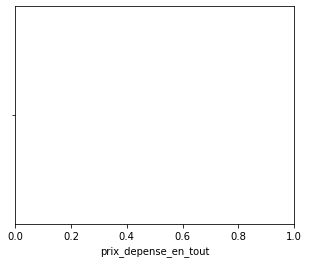

Cluster 2


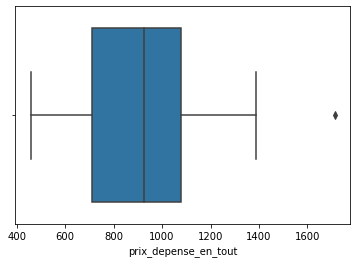

Cluster 3


C:\Users\laeti\Anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


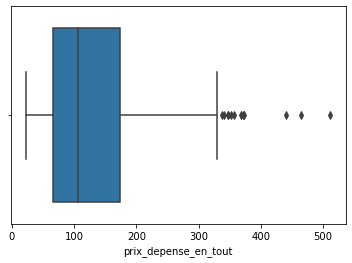

Cluster 4


C:\Users\laeti\Anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


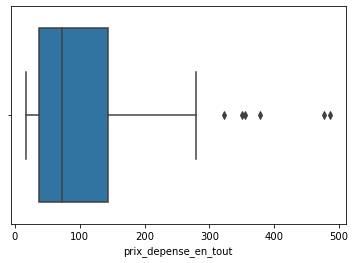

Cluster 5


C:\Users\laeti\Anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


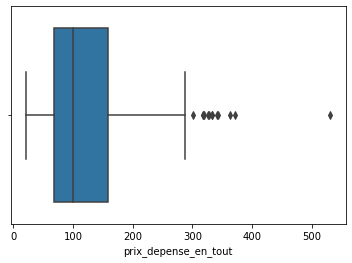

C:\Users\laeti\Anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Cluster 6


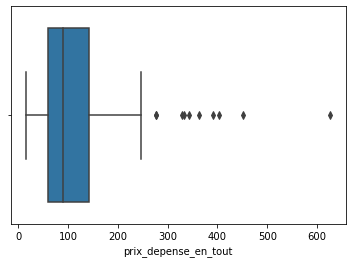

Cluster 7


C:\Users\laeti\Anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


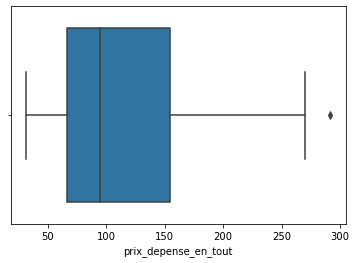

Cluster 8


C:\Users\laeti\Anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


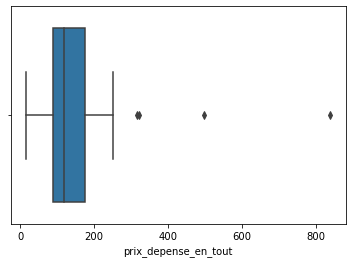

Cluster 9


C:\Users\laeti\Anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


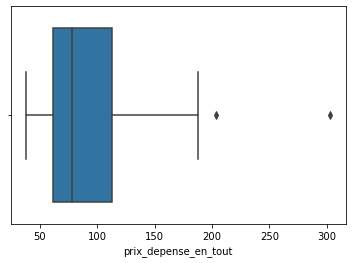

Cluster 10


C:\Users\laeti\Anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


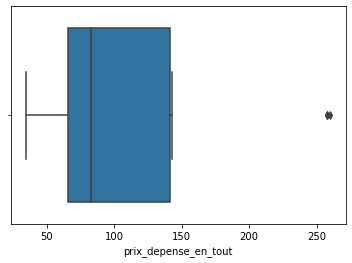

In [54]:
fig, ax = plt.subplots(figsize=(5, 4))
for i in range(10):
    data_box_plot = data_echantillonne[data_echantillonne['Clusters_echantillonne']== i]
    print('Cluster', i+1)
    sns.boxplot(data_box_plot['prix_depense_en_tout'])
    plt.show()


On calcule la moyenne de chaque clusters

In [55]:
clusters_echantillonne_means = data_echantillonne.groupby("Clusters_echantillonne").mean().reset_index()
clusters_echantillonne_means

Clusters_echantillonne  distance_haversine  payment_installments     score  \
0                       1          475.782500              1.777778  4.527778   
1                       2          548.467665              2.038095  4.453968   
2                       3          499.603985              1.745562  4.502959   
3                       4          511.772265              1.900552  4.577348   
4                       5          501.907954              1.803030  4.444444   
5                       6          530.900462              1.974359  4.461538   
6                       7          489.807446              1.877551  4.336735   
7                       8          517.993925              2.259259  4.814815   
8                       9          454.096446              1.933333  4.666667   
9                      10          414.539032              1.062500  4.562500   

   delai_de_livraison  mois_commande_le_plus_frequent  ratio_frais_de_port  \
0           10.888889                        6.111111             0.094795   
1           10.660053                        6.095238             0.298616   
2            9.244576                        6.047337             0.422441   
3            8.205801                        6.419890             0.268936   
4            9.404040                        5.871212             0.297947   
5            9.051282                        7.128205             0.277212   
6           10.173469                        6.346939             0.204574   
7            8.518519                        6.222222             0.239455   
8            5.746667                        5.466667             0.346820   
9            8.312500                        4.437500             0.300404   

   prix_depense_en_tout  nc_Books, CDs and other physical media  \
0            918.965556                                     0.0   
1            133.826159                                     0.0   
2            100.204083                                     0.0   
3            129.301326                                     0.0   
4            118.695833                                     0.0   
5            112.876538                                     0.0   
6            149.964286                                     0.0   
7             99.638519                                     0.0   
8            115.650000                                     0.0   
9             96.052500                                     1.0   

   nc_Fashion, clothing and accessoires  nc_Flowers and gifts  \
0                                   0.0                   0.0   
1                                   0.0                   0.0   
2                                   0.0                   0.0   
3                                   0.0                   0.0   
4                                   0.0                   0.0   
5                                   0.0                   0.0   
6                                   0.0                   1.0   
7                                   1.0                   0.0   
8                                   0.0                   0.0   
9                                   0.0                   0.0   

   nc_Groceries, food and drink  nc_Health and Beauty  nc_Home and furniture  \
0                           0.0              0.055556               0.388889   
1                           0.0              0.012698               0.987302   
2                           0.0              0.000000               0.000000   
3                           0.0              1.000000               0.000000   
4                           0.0              0.000000               0.000000   
5                           0.0              0.000000               0.000000   
6                           0.0              0.000000               0.000000   
7                           0.0              0.000000               0.000000   
8                           1.0              0.000000               0.000000  

MinMaxScaler():

Transforme les fonctionnalités en adaptant chaque fonctionnalité à une plage donnée.
Cet estimateur met à l'échelle et traduit chaque caractéristique individuellement de sorte qu'elle se trouve dans la plage donnée sur l'ensemble d'apprentissage, par exemple entre zéro et un.

La transformation est donnée par :

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

où min, max = feature_range.
[Source: https://scikit-learn.org/]

In [56]:
def plot_radars(data, group):

    scaler = MinMaxScaler()
    data = pd.DataFrame(scaler.fit_transform(data), #Ajuster aux données, puis les transformer.
                        index=data.index,
                        columns=data.columns).reset_index()
    
    fig = go.Figure()

    for k in data[group]:
        fig.add_trace(go.Scatterpolar(
            r=data[data[group]==k].iloc[:,1:].values.reshape(-1),
            theta=data.columns[1:],
            fill='toself',
            name='Cluster '+str(k)
        ))

    fig.update_layout(
        polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
        showlegend=True,
        title={
            'text': "Comparaison des moyennes par variable des clusters",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        title_font_color="blue",
        title_font_size=18)

    fig.show()

In [57]:
'''X_scaled = pd.DataFrame(data['Clusters'], index=data.index, columns=data.columns)
X_scaled["Clusters"] = clusters
X_scaled_clusters = X_scaled.groupby("Clusters").mean()
X_scaled_clusters'''

import plotly.graph_objs as go
from sklearn.preprocessing import  MinMaxScaler

plot_radars(clusters_echantillonne_means,
            group="Clusters_echantillonne")

La segmentation se base beaucoup sur les catégories de produit achetées. Le poids de ces features masque les autres axes de catégorisation, nous allons donc réaliser le clustering en supprimant ces variables.

## Clustering sans les categories

In [58]:
data_echantillonne.columns.tolist()

['distance_haversine',
 'payment_installments',
 'score',
 'delai_de_livraison',
 'mois_commande_le_plus_frequent',
 'ratio_frais_de_port',
 'prix_depense_en_tout',
 'nc_Books, CDs and other physical media',
 'nc_Fashion, clothing and accessoires',
 'nc_Flowers and gifts',
 'nc_Groceries, food and drink',
 'nc_Health and Beauty',
 'nc_Home and furniture',
 'nc_Others',
 'nc_Technology(including phones and computers)',
 'nc_Toys and baby equipment',
 'Clusters_echantillonne']

In [59]:
data_echantillonne_sans_categories = data_echantillonne.drop(['nc_Books, CDs and other physical media',
 'nc_Fashion, clothing and accessoires',
 'nc_Flowers and gifts',
 'nc_Groceries, food and drink',
 'nc_Health and Beauty',
 'nc_Home and furniture',
 'nc_Others',
 'nc_Technology(including phones and computers)',
 'nc_Toys and baby equipment',
 'Clusters_echantillonne'], axis = 1)

In [60]:
data_echantillonne_sans_categories.head()

distance_haversine  payment_installments  score  delai_de_livraison  \
107162          362.578359                   2.0    4.0                 1.0   
27137           758.286741                   5.0    5.0                 8.0   
88139           362.578359                   1.0    5.0                 4.0   
102245          362.578359                   1.0    3.0                 7.0   
66660           362.578359                   3.0    4.0                 5.0   

        mois_commande_le_plus_frequent  ratio_frais_de_port  \
107162                             8.0             0.063750   
27137                             10.0             0.629429   
88139                              3.0             0.273660   
102245                            12.0             0.515532   
66660                             10.0             0.261667   

        prix_depense_en_tout  
107162                136.16  
27137                 156.36  
88139                  54.64  
102245                201.49  
66660                  68.13

In [61]:
X_echantillonne_sans_categories = data_echantillonne_sans_categories.values

In [62]:
X_echantillonne_sans_categories.shape

(1000, 7)

In [63]:
names_echantillonne_sans_categories = data_echantillonne_sans_categories.index

In [64]:
features_echantillonne_sans_categories = data_echantillonne_sans_categories.columns

In [65]:
# Centrage et Réduction
std_scale_echantillonne_sans_categories = preprocessing.StandardScaler().fit(X_echantillonne_sans_categories)# Crée l'objet et calcule la moyenne et l'écart-type
X_scaled_echantillonne_sans_categories = std_scale_echantillonne_sans_categories.transform(X_echantillonne_sans_categories)# Transforme les données.

In [66]:
# Clustering hiérarchique sans les catégories
Z_echantillonne_sans_categories = linkage(X_scaled_echantillonne_sans_categories, 'ward')

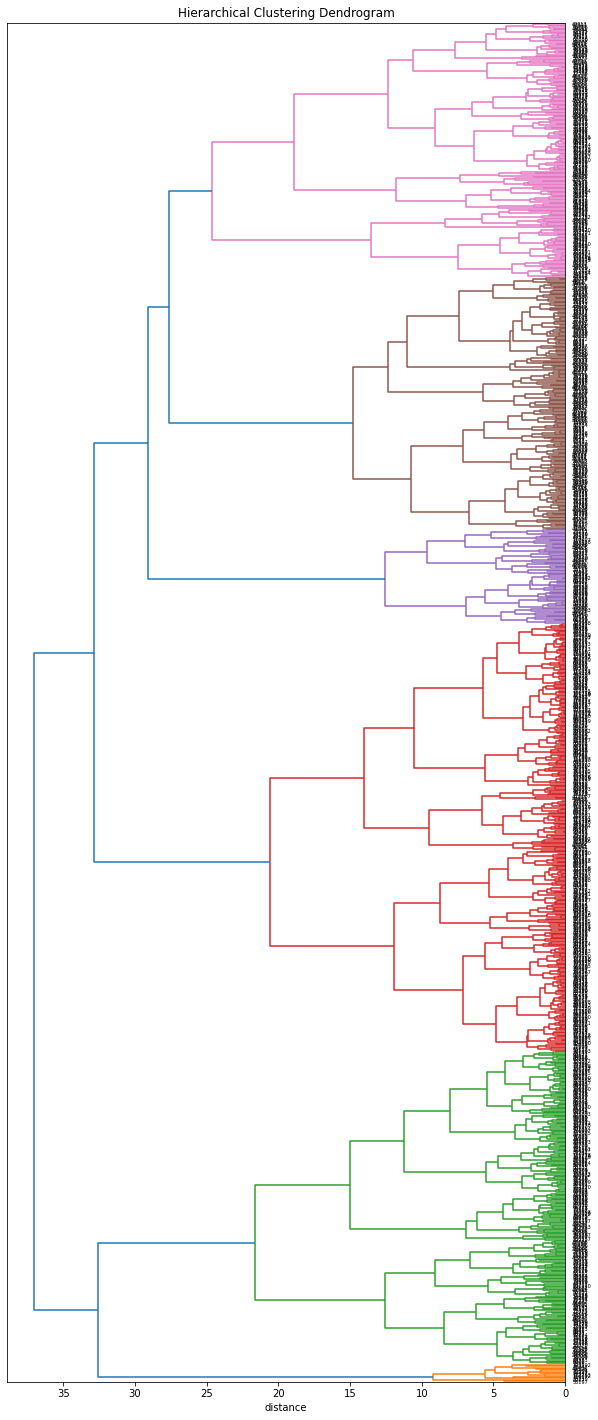

In [67]:
# Affichage du dendrogramme
plot_dendrogram(Z_echantillonne_sans_categories, names_echantillonne_sans_categories)

In [135]:
# Coupage du dendrogramme en 7 clusters
clusters_echantillonne_sans_categories = fcluster(Z_echantillonne_sans_categories, 7, criterion='maxclust')

In [136]:
data_echantillonne_sans_categories['Clusters_echantillonne_sans_categories'] = clusters_echantillonne_sans_categories

In [137]:
data_echantillonne_sans_categories_clusters_1= data_echantillonne_sans_categories[data_echantillonne_sans_categories['Clusters_echantillonne_sans_categories'] == 1]
data_echantillonne_sans_categories_clusters_1.describe()

distance_haversine  payment_installments      score  \
count           13.000000             13.000000  13.000000   
mean           494.058226              1.692308   4.269231   
std            267.083761              1.315587   0.856723   
min            200.609620              1.000000   2.500000   
25%            362.578359              1.000000   4.000000   
50%            362.578359              1.000000   4.500000   
75%            561.233868              2.000000   5.000000   
max           1078.477129              5.000000   5.000000   

       delai_de_livraison  mois_commande_le_plus_frequent  \
count           13.000000                       13.000000   
mean            11.615385                        5.461538   
std              6.739664                        3.281651   
min              3.000000                        1.000000   
25%              7.000000                        3.000000   
50%             10.000000                        6.000000   
75%             16.000000                        8.000000   
max             24.000000                       11.000000   

       ratio_frais_de_port  prix_depense_en_tout  \
count            13.000000             13.000000   
mean              0.055857           1061.116154   
std               0.029145            254.401811   
min               0.022438            793.090000   
25%               0.035188            907.860000   
50%               0.041199            972.480000   
75%               0.069184           1102.600000   
max               0.122443           1714.020000   

       Clusters_echantillonne_sans_categories  
count                                    13.0  
mean                                      1.0  
std                                       0.0  
min                                       1.0  
25%                                       1.0  
50%                                       1.0  
75%                                       1.0  
max                                       1.0

Le cluster 1, correspond à des clients qui payent en général entre 1 et 2 fois en général. Ils sont plutôt satisfaits d'Olist, qu'ils notent entre 4 et 5 en général avec un minimum à 2.5. Le délai de livraison en entre 7 et 16 jours en général. Ils commandent en général au minimum en janvier, puis en mars,  en juin,  en août et en novembre. Le ratio_frais_de_port est de 0.05 en moyenne. Ils dépensent au minimum 793.09, 25% dépensent 907.48 et moins, 50% 972.48 et moins et 75% 1102.6 et moins.  La distance Haversine est un peu plus de la moitié de la distance maximale entre Olist et une ville, en général. 

In [138]:
data_echantillonne_sans_categories_clusters_2= data_echantillonne_sans_categories[data_echantillonne_sans_categories['Clusters_echantillonne_sans_categories'] == 2]
data_echantillonne_sans_categories_clusters_2.describe()

distance_haversine  payment_installments       score  \
count          231.000000            231.000000  231.000000   
mean           526.164914              3.679654    4.628427   
std            244.192936              0.919107    0.670716   
min            200.609620              2.000000    2.000000   
25%            362.578359              3.000000    4.000000   
50%            362.578359              4.000000    5.000000   
75%            724.650683              4.000000    5.000000   
max           1079.802245              5.000000    5.000000   

       delai_de_livraison  mois_commande_le_plus_frequent  \
count          231.000000                      231.000000   
mean             8.883478                        6.290043   
std              4.993623                        3.145436   
min              0.000000                        1.000000   
25%              6.000000                        4.000000   
50%              8.000000                        7.000000   
75%             11.000000                        8.000000   
max             26.000000                       12.000000   

       ratio_frais_de_port  prix_depense_en_tout  \
count           231.000000            231.000000   
mean              0.217373            152.065325   
std               0.127419             96.154940   
min               0.000000             31.730000   
25%               0.123571             79.075000   
50%               0.181500            130.560000   
75%               0.299744            195.050000   
max               0.762381            626.480000   

       Clusters_echantillonne_sans_categories  
count                                   231.0  
mean                                      2.0  
std                                       0.0  
min                                       2.0  
25%                                       2.0  
50%                                       2.0  
75%                                       2.0  
max                                       2.0

Le cluster 2, correspond à des clients qui payent en général entre 3 et 4 fois. Ils sont plutôt  satisfaits d'Olist, qu'ils notent entre 4 et 5 en général avec un minimum à 2. Le délai de livraison en entre 6 et 11 jours. Ils commandent en général au minimum en janvier, puis en avril, en juillet, en août et en décembre. Le ratio_frais_de_port est de 0.2174 en moyenne. Ils dépensent au minimum 31.73, 25% dépensent 79.075 et moins, 50% 130.56 et moins et 75% 195.05 et moins.  La distance Haversine est un peu plus de la moitié de la distance maximale entre Olist et une ville, en général.

In [139]:
data_echantillonne_sans_categories_clusters_3= data_echantillonne_sans_categories[data_echantillonne_sans_categories['Clusters_echantillonne_sans_categories'] == 3]
data_echantillonne_sans_categories_clusters_3.describe()

distance_haversine  payment_installments       score  \
count          314.000000            314.000000  314.000000   
mean           357.477294              1.280255    4.635350   
std             68.462793              0.534250    0.524338   
min            200.609620              1.000000    3.000000   
25%            362.578359              1.000000    4.000000   
50%            362.578359              1.000000    5.000000   
75%            362.578359              1.000000    5.000000   
max            812.356335              3.000000    5.000000   

       delai_de_livraison  mois_commande_le_plus_frequent  \
count          314.000000                      314.000000   
mean             6.367304                        6.063694   
std              3.672392                        3.253274   
min             -1.000000                        1.000000   
25%              4.000000                        4.000000   
50%              6.000000                        6.000000   
75%              8.250000                        8.000000   
max             18.000000                       12.000000   

       ratio_frais_de_port  prix_depense_en_tout  \
count           314.000000            314.000000   
mean              0.218940            132.954108   
std               0.117442            111.035021   
min               0.000000             20.870000   
25%               0.131606             59.142500   
50%               0.198839             94.475000   
75%               0.285591            164.062500   
max               0.631707            719.370000   

       Clusters_echantillonne_sans_categories  
count                                   314.0  
mean                                      3.0  
std                                       0.0  
min                                       3.0  
25%                                       3.0  
50%                                       3.0  
75%                                       3.0  
max                                       3.0

Le cluster 3, correspond à des clients qui sont à distance haversine de 691.01 et moins pour les 75%. Ils payent en général 1 fois. Ils sont plutôt très satisfait d'Olist, qu'ils notent entre 5 en général avec un minimum à 3. Le délai de livraison en entre 6 et 12 jours. Ils commandent en général au minimum en janvier, puis en mars, en juin et en août. Le ratio_frais_de_port est de 0.8 en moyenne. Ils dépensent au minimum 15.38, 25% dépensent 30.8125 et moins, 50% 38.61 et moins et 75% 50.565 et moins

In [140]:
data_echantillonne_sans_categories_clusters_4= data_echantillonne_sans_categories[data_echantillonne_sans_categories['Clusters_echantillonne_sans_categories'] == 4]
data_echantillonne_sans_categories_clusters_4.describe()

distance_haversine  payment_installments      score  \
count           70.000000             70.000000  70.000000   
mean           573.618737              1.628571   2.607143   
std            253.122831              0.903639   0.544357   
min            200.609620              1.000000   2.000000   
25%            362.578359              1.000000   2.000000   
50%            561.233868              1.000000   3.000000   
75%            812.356335              2.000000   3.000000   
max           1079.802245              4.000000   4.000000   

       delai_de_livraison  mois_commande_le_plus_frequent  \
count           70.000000                       70.000000   
mean            11.078571                        5.528571   
std              6.444656                        3.229041   
min              1.000000                        1.000000   
25%              6.000000                        3.000000   
50%              9.000000                        5.000000   
75%             16.000000                        8.000000   
max             28.000000                       12.000000   

       ratio_frais_de_port  prix_depense_en_tout  \
count            70.000000             70.000000   
mean              0.330245            101.914857   
std               0.191853             58.243705   
min               0.066043             22.720000   
25%               0.192253             64.755000   
50%               0.283088             87.495000   
75%               0.417485            138.640000   
max               0.997270            288.180000   

       Clusters_echantillonne_sans_categories  
count                                    70.0  
mean                                      4.0  
std                                       0.0  
min                                       4.0  
25%                                       4.0  
50%                                       4.0  
75%                                       4.0  
max                                       4.0

Le cluster 4, correspond à des clients qui sont à distance haversine de 812.36 et moins pour les 75%. Ils payent en général 1 à 2 fois. Ils sont plutôt moyennement satisfait d'Olist, qu'ils notent 3 en général avec un minimum à 2 et un maximum à 4. Le délai de livraison en entre 6 et 16 jours. Ils commandent en général au minimum en janvier, puis en mars, en mai,  en août et en décembre. Le ratio_frais_de_port est de 0.33 en moyenne. Ils dépensent au minimum 58.24, 25% dépensent 4.76 et moins, 50% 87.5 et moins et 75% 138.64 et moins

In [141]:
data_echantillonne_sans_categories_clusters_5= data_echantillonne_sans_categories[data_echantillonne_sans_categories['Clusters_echantillonne_sans_categories'] == 5]
data_echantillonne_sans_categories_clusters_5.describe()

distance_haversine  payment_installments       score  \
count          185.000000            185.000000  185.000000   
mean           809.670353              1.329730    4.659459   
std            145.435564              0.776301    0.539454   
min            561.233868              1.000000    3.000000   
25%            691.014624              1.000000    4.000000   
50%            812.356335              1.000000    5.000000   
75%            812.356335              1.000000    5.000000   
max           1079.802245              5.000000    5.000000   

       delai_de_livraison  mois_commande_le_plus_frequent  \
count           185.00000                      185.000000   
mean              9.72973                        7.621622   
std               4.89370                        2.831801   
min               1.00000                        1.000000   
25%               6.00000                        6.000000   
50%               9.00000                        8.000000   
75%              12.00000                       10.000000   
max              28.00000                       12.000000   

       ratio_frais_de_port  prix_depense_en_tout  \
count           185.000000            185.000000   
mean              0.322378            120.197405   
std               0.205648             68.409154   
min               0.000000             25.410000   
25%               0.167852             71.150000   
50%               0.282056             97.520000   
75%               0.432637            157.660000   
max               1.258333            352.630000   

       Clusters_echantillonne_sans_categories  
count                                   185.0  
mean                                      5.0  
std                                       0.0  
min                                       5.0  
25%                                       5.0  
50%                                       5.0  
75%                                       5.0  
max                                       5.0

Le cluster 5, correspond à des clients qui sont à distance haversine de 812.36 et moins pour les 75%. Ils payent en général 1 à 2 fois. Ils ne sont pas satisfait d'Olist, qu'ils notent 1 en général avec un minimum. Le délai de livraison en entre 6 et 12 jours. Ils commandent en général au minimum en janvier, en juin, en août, en octobre et en décembre. Le ratio_frais_de_port est de 0.322 en moyenne. Ils dépensent au minimum 25.41, 25% dépensent 71.15 et moins, 50% 97.52 et moins et 75% 157.66 et moins

In [142]:
data_echantillonne_sans_categories_clusters_6= data_echantillonne_sans_categories[data_echantillonne_sans_categories['Clusters_echantillonne_sans_categories'] == 6]
data_echantillonne_sans_categories_clusters_6.describe()

distance_haversine  payment_installments      score  \
count           50.000000             50.000000  50.000000   
mean           398.508197              1.320000   4.620000   
std            207.631799              0.652781   0.666701   
min            200.609620              1.000000   3.000000   
25%            239.111720              1.000000   4.000000   
50%            362.578359              1.000000   5.000000   
75%            362.578359              1.000000   5.000000   
max            990.794826              3.000000   5.000000   

       delai_de_livraison  mois_commande_le_plus_frequent  \
count           50.000000                       50.000000   
mean             8.110000                        6.440000   
std              4.709186                        2.548789   
min              1.000000                        1.000000   
25%              4.250000                        5.000000   
50%              8.000000                        6.000000   
75%             12.000000                        8.000000   
max             18.000000                       12.000000   

       ratio_frais_de_port  prix_depense_en_tout  \
count            50.000000             50.000000   
mean              0.953319             36.940000   
std               0.362124             20.551101   
min               0.510504             15.380000   
25%               0.739211             25.792500   
50%               0.849131             31.225000   
75%               1.141388             41.150000   
max               2.689482            110.120000   

       Clusters_echantillonne_sans_categories  
count                                    50.0  
mean                                      6.0  
std                                       0.0  
min                                       6.0  
25%                                       6.0  
50%                                       6.0  
75%                                       6.0  
max                                       6.0

Le cluster 6, correspond à des clients qui sont à distance haversine de 362.578 et moins pour les 75%. Ils payent en général en 1 fois. Ils sont plutôt pas très satisfaits d'Olist, qu'ils notent entre 5 et 5 en général avec un minimum à 3. Le délai de livraison en entre 4 et 12 jours. Ils commandent en général au minimum en janvier, puis en mai, en juin, en août et en decembre. Le ratio_frais_de_port est de 0.953 en moyenne. Ils dépensent au minimum 15.38, 25% dépensent 25.79 et moins, 50% 31.23 et moins et 75% 41.15 et moins

In [143]:
data_echantillonne_sans_categories_clusters_7= data_echantillonne_sans_categories[data_echantillonne_sans_categories['Clusters_echantillonne_sans_categories'] == 7]
data_echantillonne_sans_categories_clusters_7.describe()

distance_haversine  payment_installments       score  \
count          137.000000            137.000000  137.000000   
mean           492.009865              1.489051    4.660584   
std            223.233433              1.029826    0.621118   
min            200.609620              1.000000    2.000000   
25%            362.578359              1.000000    4.000000   
50%            362.578359              1.000000    5.000000   
75%            691.014624              1.000000    5.000000   
max           1079.802245              5.000000    5.000000   

       delai_de_livraison  mois_commande_le_plus_frequent  \
count          137.000000                      137.000000   
mean            16.884063                        4.598540   
std              8.107045                        3.068962   
min              4.750000                        1.000000   
25%             11.000000                        2.000000   
50%             15.000000                        4.000000   
75%             21.000000                        6.000000   
max             44.000000                       12.000000   

       ratio_frais_de_port  prix_depense_en_tout  \
count           137.000000            137.000000   
mean              0.388178            108.979562   
std               0.207530             87.865739   
min               0.000000             27.290000   
25%               0.227034             49.340000   
50%               0.364673             78.020000   
75%               0.541219            134.380000   
max               1.044295            511.370000   

       Clusters_echantillonne_sans_categories  
count                                   137.0  
mean                                      7.0  
std                                       0.0  
min                                       7.0  
25%                                       7.0  
50%                                       7.0  
75%                                       7.0  
max                                       7.0

Le cluster 7, correspond à des clients qui sont à distance haversine de 691.01 et moins pour les 75%. Ils payent en général  en 1 fois. Ils sont plutôt  très satisfait d'Olist, qu'ils notent entre 4 et 5 en général avec un minimum à 2. Le délai de livraison en entre 4 et 21 jours. Ils commandent en général au minimum en janvier, puis février, puis avril, en juin et en decembre. Le ratio_frais_de_port est de 0.388 en moyenne. Ils dépensent au minimum 27.29, 25% dépensent 49.34 et moins, 50% 78.02 et moins et 75% 134.38 et moins

In [146]:
clusters_echantillonne_sans_categories_means = data_echantillonne_sans_categories.groupby("Clusters_echantillonne_sans_categories").mean().reset_index()
clusters_echantillonne_sans_categories_means

Clusters_echantillonne_sans_categories  distance_haversine  \
0                                       1          494.058226   
1                                       2          526.164914   
2                                       3          357.477294   
3                                       4          573.618737   
4                                       5          809.670353   
5                                       6          398.508197   
6                                       7          492.009865   

   payment_installments     score  delai_de_livraison  \
0              1.692308  4.269231           11.615385   
1              3.679654  4.628427            8.883478   
2              1.280255  4.635350            6.367304   
3              1.628571  2.607143           11.078571   
4              1.329730  4.659459            9.729730   
5              1.320000  4.620000            8.110000   
6              1.489051  4.660584           16.884063   

   mois_commande_le_plus_frequent  ratio_frais_de_port  prix_depense_en_tout  
0                        5.461538             0.055857           1061.116154  
1                        6.290043             0.217373            152.065325  
2                        6.063694             0.218940            132.954108  
3                        5.528571             0.330245            101.914857  
4                        7.621622             0.322378            120.197405  
5                        6.440000             0.953319             36.940000  
6                        4.598540             0.388178            108.979562

In [150]:
plot_radars(clusters_echantillonne_sans_categories_means,
            group="Clusters_echantillonne_sans_categories")

Groupe rose (0.999...) : 
    Groupe commandant plutôt en début d'année avec une distance à Olist de 0.29 par rapport à la distance maximale. Ils dépensent de petites sommes payées en une fois. Ils notent Olist pour un score de 5 environ. Le délai de livraison est maximal. Ils font partie du cluster 7 

Groupe bleu clair (0.8333...):
        Groupe commandant plutôt en milieu d'année avec une petite distance au  siège de Olist pour de petites sommes payées en une fois. Le ratio_frais_de_port est maximum. Ils notent Olist 5 environ. Le delai_de_livraison est bas. Il font partie à peu près du cluster 7.
        

Groupe orange (0.666...): Groupe commandant plutôt en fin d'année avec une grande distance du siège de Olist (maximum) pour de petites sommes payées en une fois. Le ratio_frais_de_port est à 0.29. Ils notent Olist un peut plus de 5 environ. Le delai_de_livraison est bas.

Groupe violet(0.5): Groupe avec une petite distance du siège de Olist pour de petites sommes payées en une fois.Ils notent Olist un peu entre de 3 et 4. Le delai_de_livraison est presque moyen.

Groupe vert (0.33): ils commandent en général en milieu d'année pour de petites sommes. Ils notent Olist 5.  Le delai de livraison est quasiment égale à 0. Ils sont à une très petite distance de Olist. Ils payent en une fois.

Groupe rouge (0.166...): Groupe commandant plutôt en début d'année avec une petite distance du siège de Olist pour de 0.3 fois la distance haversine maximale. Ils payent pour des petites sommes payés est un maximum de fois. Le ratio_frais_de_port est de 0.18. Ils notent Olist à presque 5. Le delai_de_livraison est bas.

Groupe bleu foncé(0.0): Groupe commandant plutôt en début d'année avec une petite distance du siège de Olist pour de petites sommes payées maximales une fois. Le ratio_frais_de_port est bas. Ils notent Olist 4. Le delai_de_livraison est moyen.

# Representation t-SNE

## Visualisation 2D

In [80]:
from sklearn.manifold import TSNE
# [ source : https://danielmuellerkomorowska.com/]
 
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components, init='pca', random_state=0, n_jobs=-1)
tsne_result = tsne.fit_transform(X_scaled_echantillonne_sans_categories)
tsne_result.shape


C:\Users\laeti\Anaconda3\envs\geo_env\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

C:\Users\laeti\Anaconda3\envs\geo_env\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



(1000, 2)

In [81]:
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE

'''tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)'''

#plot_embedding(tsne_result, "Principal Components projection of the digits")
#plt.show()

columns = ['DIM' + str(c) for c in range(1,tsne_result.shape[1]+1, 1)]
tsne_result = pd.DataFrame(tsne_result, index=data_echantillonne_sans_categories.index, columns= columns)
tsne_result.head()

DIM1       DIM2
107162  -1.928597  -6.620397
27137   22.555761  21.560266
88139  -17.743259 -35.189793
102245  -3.321658   6.033187
66660   12.082344  -5.579613

In [82]:
data_echantillonne_sans_categories.columns.tolist()

['distance_haversine',
 'payment_installments',
 'score',
 'delai_de_livraison',
 'mois_commande_le_plus_frequent',
 'ratio_frais_de_port',
 'prix_depense_en_tout',
 'Clusters_echantillonne_sans_categories']

In [83]:
#data['nouvelles_categories'].unique()

In [84]:
y = data_echantillonne_sans_categories['Clusters_echantillonne_sans_categories']

In [85]:
dict_colors = {1: 'forestgreen', 2:'royalblue', 3:'orange', 4:'crimson', 5:'black', 6:'aliceblue', 7:'aqua',  8:'bisque'}
#'Flowers and gifts':'aquamarine', 'Groceries, food and drink':'azure', 9:'blue', 10:'blueviolet'
#, 10:'bisque', 11:'blue', 12:'blueviolet', 13:'burlywood', 14:'cadetblue', 15:'beige', 16:'brown', 17: 'black', 18:'yellow', 19:'cyan', 20:'magenta', 21:'purple', 22:'red'

In [86]:
y_colors = [dict_colors[yi] for yi in y]

<AxesSubplot:xlabel='DIM1', ylabel='DIM2'>

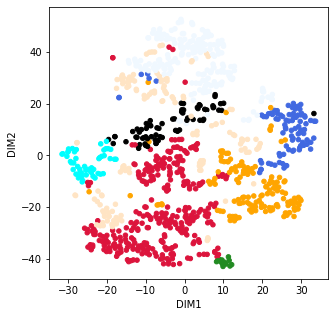

In [87]:
tsne_result.plot(x='DIM1', y= 'DIM2', kind = 'scatter', figsize=(5,5),color= y_colors)

In [88]:
tsne.kl_divergence_

1.0235239267349243

## Visualisation 3D

In [89]:
n_components = 3
tsne = TSNE(n_components, init='pca', perplexity = 45,  random_state=0, n_jobs=-1)
tsne_result = tsne.fit_transform(X_scaled_echantillonne_sans_categories)
tsne_result.shape

C:\Users\laeti\Anaconda3\envs\geo_env\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

C:\Users\laeti\Anaconda3\envs\geo_env\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



(1000, 3)

In [90]:
columns = ['DIM' + str(c) for c in range(1,tsne_result.shape[1]+1, 1)]
tsne_result = pd.DataFrame(tsne_result, index=data_echantillonne_sans_categories.index, columns= columns)
tsne_result.head()

DIM1       DIM2      DIM3
107162  0.790840   8.429588  4.595780
27137  -9.071651  -1.323492 -2.329014
88139   3.098109  -4.818606  8.155544
102245  4.469761  10.390380  0.001253
66660  -1.619104   8.652992  2.229092

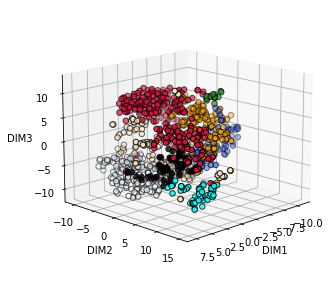

In [91]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection = '3d')
ax.scatter(tsne_result['DIM1'],tsne_result['DIM2'], tsne_result['DIM3'], marker = 'o', s=30, edgecolor = 'k', facecolor = y_colors)
ax.set_xlabel('DIM1')
ax.set_ylabel('DIM2')
ax.set_zlabel('DIM3')
ax.view_init(elev=15, azim=45)

In [92]:
#fig = px.scatter_3d(tsne_result, color = y_colors )
#fig.show()
#fig = plt.figure(figsize=(5,5))
#px = fig.add_subplot(projection = '3d')
#px.scatter(y,  color = y_colors)
#px.set_xlabel('DIM1')
#px.set_ylabel('DIM2')
#px.set_zlabel('DIM3')
#px.view_init(elev=15, azim=45)

import plotly.express as px
fig = px.scatter_3d(tsne_result, x='DIM1', y='DIM2', z='DIM3', color=y_colors, title="3D Scatter Plot")
fig.show()

In [93]:
tsne.kl_divergence_

0.8362656831741333

# K-means

[Source: Kaggle]

K-means (k-moyennes) est un  algorithme non supervisé  de clustering, populaire en Machine Learning. [ Source : https://mrmint.fr/algorithme-k-means]

In [94]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.23.2

Found existing installation: scikit-learn 1.1.2
Uninstalling scikit-learn-1.1.2:
  Successfully uninstalled scikit-learn-1.1.2


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\laeti\Anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 173, in _main
    status = self.run(options, args)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\pip\_internal\commands\uninstall.py", line 97, in run
    uninstall_pathset.commit()
  File "C:\Users\laeti\Anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 436, in commit
    self._moved_paths.commit()
  File "C:\Users\laeti\Anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 287, in commit
    save_dir.cleanup()
  File "C:\Users\laeti\Anaconda3\lib\site-packages\pip\_internal\utils\temp_dir.py", line 184, in cleanup
    rmtree(self._path)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 326, in wrapped_f
    return self(f, *args, **kw)
  File "C:\Users\laeti\Anaconda3\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 406, in __call__
    do = self.iter(r

  Using cached scikit-learn-0.23.2.tar.gz (7.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\laeti\Anaconda3\python.exe' 'C:\Users\laeti\AppData\Local\Temp\pip-standalone-pip-s16sqvlm\__env_pip__.zip\pip' install --ignore-installed --no-user --prefix 'C:\Users\laeti\AppData\Local\Temp\pip-build-env-zploakaa\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel 'Cython>=0.28.5' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_python_implementation == '"'"'CPython'"'"'' 'numpy==1.14.0; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_python_implementation != '"'"'CPython'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.6'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.7'"'"' and pl

In [95]:
!pip install kmodes

  Using cached scikit_learn-1.1.2-cp39-cp39-win_amd64.whl (7.4 MB)


In [96]:
#!pip install yellowbrick

In [97]:
#!pip install -U yellowbrick

In [98]:
#conda install -c districtdatalabs yellowbrick

In [99]:
from sklearn.cluster import KMeans

Exécution de K-Means avec une plage de k

Nous pouvons facilement exécuter K-Means pour une gamme de clusters en utilisant une boucle for et en collectant les distorsions dans une liste.

In [100]:
 numerical_features = data.columns.tolist()

In [101]:
numerical_features

['distance_haversine',
 'payment_installments',
 'score',
 'delai_de_livraison',
 'mois_commande_le_plus_frequent',
 'ratio_frais_de_port',
 'prix_depense_en_tout',
 'nc_Books, CDs and other physical media',
 'nc_Fashion, clothing and accessoires',
 'nc_Flowers and gifts',
 'nc_Groceries, food and drink',
 'nc_Health and Beauty',
 'nc_Home and furniture',
 'nc_Others',
 'nc_Technology(including phones and computers)',
 'nc_Toys and baby equipment']

In [102]:
from sklearn.compose import ColumnTransformer, make_column_transformer
scaler = MinMaxScaler()

preprocessor = ColumnTransformer([
    ('scaler', scaler, numerical_features)])

#preprocessor = ColumnTransformer( transformers=[('num', MinMaxScaler(),numerical_features)])

In [103]:
#train_data = preprocessor.fit_transform(data)

In [104]:
#train_data

Le but du pipeline est d'assembler plusieurs étapes qui peuvent être validées ensemble tout en définissant différents paramètres. Pour cela, il permet de paramétrer les différentes étapes à l'aide de leurs noms et du nom du paramètre séparés par un '__ . 

Yellowbrick étend l'API Scikit-Learn pour faciliter la sélection des modèles et le réglage des hyperparamètres. Sous le capot, il utilise Matplotlib.

Une étape fondamentale pour tout algorithme non supervisé consiste à déterminer le nombre optimal de clusters dans lesquels les données peuvent être regroupées. La méthode du coude est l'une des méthodes les plus populaires pour déterminer cette valeur optimale de k.
Nous démontrons maintenant la méthode donnée en utilisant la technique de clustering K-Means en utilisant la bibliothèque Sklearn de python.

Le KElbowVisualizer met en œuvre la méthode du « coude » pour aider les scientifiques des données à sélectionner le nombre optimal de clusters en ajustant le modèle avec une plage de valeurs pour. Si le graphique linéaire ressemble à un bras, le « coude » (le point d'inflexion sur la courbe) est une bonne indication que le modèle sous-jacent s'adapte le mieux à ce point. Dans le visualiseur, "coude" sera annoté par une ligne en pointillés.

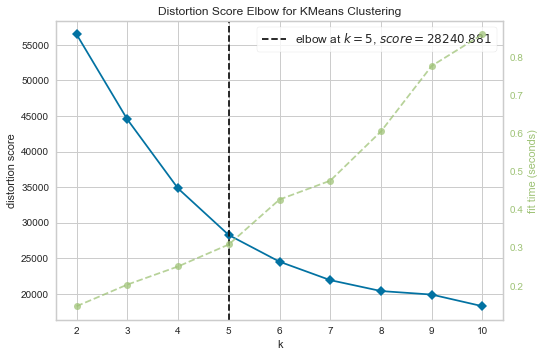

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [105]:
# Elbow method
from sklearn.pipeline import Pipeline, make_pipeline
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("kelbowvisualizer", KElbowVisualizer(KMeans(),K=(4,12)))])
kmeans_visualizer.fit(data)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

On peut observer que le « coude » est le chiffre 5 qui est optimal pour ce cas. Nous pouvons maintenant exécuter un K-Means en utilisant comme n_clusters le nombre 5.

In [106]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(X_scaled)

KMeans(n_clusters=5)

In [107]:
df2 = deepcopy(X_scaled)

K-Means vs Réel pour n_clusters=4
(Representation)

## Coefficient de silhouette

Pour vérifier si ce clustering fonctionne, nous allons utiliser SilhouetteVisualizer pour afficher le coefficient de silhouette pour un échantillonage de chaque cluster. Cela permet de visualiser la densité et la séparation des clusters.

En partitionnement de données (clustering), le coefficient de silhouette est une mesure de qualité d'une partition d'un ensemble de données en classification automatique1. Pour chaque point, son coefficient de silhouette est la différence entre la distance moyenne avec les points du même groupe que lui (cohésion) et la distance moyenne avec les points des autres groupes voisins (séparation). Si cette différence est négative, le point est en moyenne plus proche du groupe voisin que du sien : il est donc mal classé. À l'inverse, si cette différence est positive, le point est en moyenne plus proche de son groupe que du groupe voisin : il est donc bien classé.

Le coefficient de silhouette proprement dit est la moyenne du coefficient de silhouette pour tous les points.
[Source : Wikipédia]

Les coefficients de silhouette (comme ces valeurs sont appelées) proches de +1 indiquent que l'échantillon est éloigné des grappes voisines. Une valeur de 0 indique que l'échantillon est sur ou très proche de la limite de décision entre deux clusters voisins et des valeurs négatives indiquent que ces échantillons ont peut-être été affectés au mauvais cluster.
[https://scikit-learn.org/]

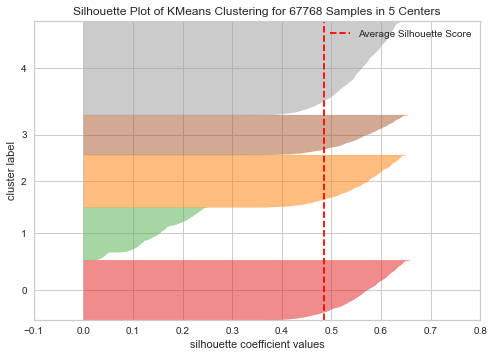

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 67768 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [108]:
# Meilleur K dans le coude
K = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_

# Visualiseur de silhouettes
silhouette_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("silhouettevisualizer", SilhouetteVisualizer(KMeans(K)))])
silhouette_visualizer.fit(data)
silhouette_visualizer.named_steps['silhouettevisualizer'].show()

Nous constatons que les clusters sont bien séparés. 

L'indice Calinski-Harabasz est basé sur l'idée que les clusters qui sont eux-mêmes très compacts et bien espacés les uns des autres sont de bons clusters. L'indice est calculé en divisant la variance des sommes des carrés des distances des objets individuels à leur centre de cluster par la somme des carrés de la distance entre les centres de cluster. Plus la valeur de l'indice Calinski-Harabasz est élevée, meilleur est le modèle de clustering. [ Source : https://towardsdatascience.com/]

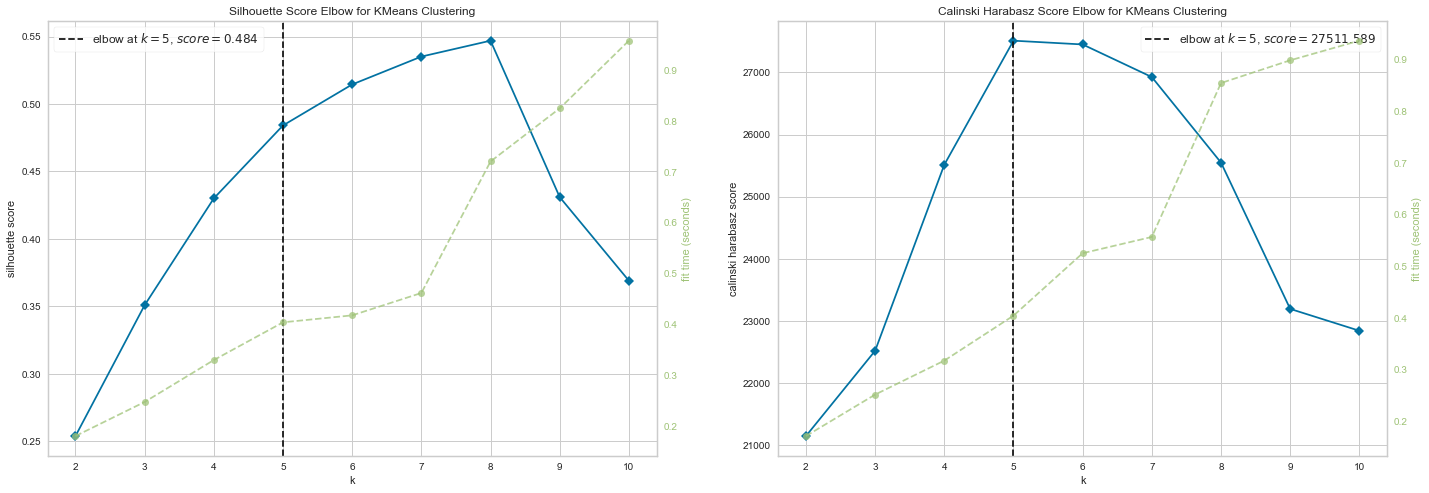

In [109]:
# Elbow method avec differentes métriques
metrics = ["silhouette", "calinski_harabasz"]
i = 0

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(24,8))
for m in metrics:
    kmeans_visualizer = Pipeline([
        ("preprocessor", preprocessor),
        ("kelbowvisualizer", KElbowVisualizer(KMeans(),
                                              K=(4,10),
                                              metric=m,
                                              ax=axes[i]))])
    kmeans_visualizer.fit(data)
    kmeans_visualizer.named_steps['kelbowvisualizer'].finalize()
    i+=1

plt.show()

## Distance intercluster

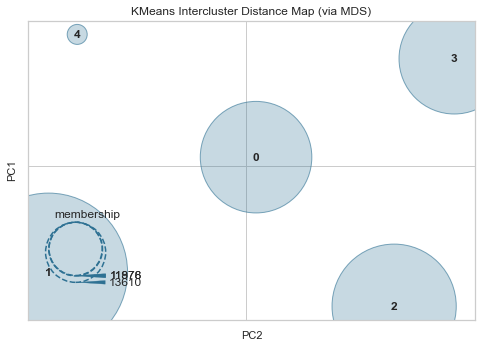

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [110]:
#Distance intercluster dessiné avec le meilleur k.
distance_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("distancevisualizer", InterclusterDistance(KMeans(K)))])
distance_visualizer.fit(data)
distance_visualizer.named_steps['distancevisualizer'].show()

On voit que les clusters sont bien séparés. 

## Analyse des différents clusters

In [111]:
# KMeans Pipeline avec le meiller K
kmeans_model = Pipeline([("preprocessor", preprocessor),
                         ("kmeans", KMeans(K))])
kmeans_model.fit(data)

# Kmeans labels
kmeans_labels = kmeans_model.named_steps['kmeans'].labels_
data["kmeans_label"] = kmeans_labels

In [112]:
#X_scaled = preprocessor.fit_transform(data)
#X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_scaled = pd.DataFrame(data, index=data.index, columns=data.columns)
X_scaled["kmeans_label"] = kmeans_labels
X_scaled_clusters = X_scaled.groupby("kmeans_label").mean()
X_scaled_clusters

distance_haversine  payment_installments     score  \
kmeans_label                                                       
0                     516.872692              1.600286  4.439682   
1                     511.806098              1.876561  4.551319   
2                     513.123740              1.858010  4.512098   
3                     509.886918              1.990257  4.432485   
4                     518.558906              1.935215  4.510198   

              delai_de_livraison  mois_commande_le_plus_frequent  \
kmeans_label                                                       
0                       9.971476                        5.672364   
1                       8.954331                        6.062087   
2                       9.157474                        5.956056   
3                      10.008416                        6.071163   
4                       8.980332                        6.365837   

              ratio_frais_de_port  prix_depense_en_tout  \
kmeans_label                                              
0                        0.397063            137.726878   
1                        0.286494            137.481932   
2                        0.282812            152.945568   
3                        0.318040            157.976774   
4                        0.270733            139.431815   

              nc_Books, CDs and other physical media  \
kmeans_label                                           
0                                           0.000000   
1                                           0.000000   
2                                           0.000000   
3                                           0.000000   
4                                           0.080481   

              nc_Fashion, clothing and accessoires  nc_Flowers and gifts  \
kmeans_label                                                               
0                                         0.000000              0.000000   
1                                         0.000000              0.000000   
2                                         0.000000              0.000000   
3                                         0.000000              0.000000   
4                                         0.195024              0.271581   

              nc_Groceries, food and drink  nc_Health and Beauty  \
kmeans_label                                                       
0                                 0.000000                   0.0   
1                                 0.000000                   1.0   
2                                 0.000000                   0.0   
3                                 0.000000                   0.0   
4                                 0.070296                   0.0   

              nc_Home and furniture  nc_Others  \
kmeans_label                                     
0                               0.0        0.0   
1                               0.0        0.0   
2                               0.0        1.0   
3                               1.0        0.0   
4                               0.0        0.0   

              nc_Technology(including phones and computers)  \
kmeans_label                                                  
0                                                       1.0   
1                                                       0.0   
2                                                       0.0   
3                                                       0.0   
4                                                       0.0   

              nc_Toys and baby equipment  
kmeans_label                              
0                               0.000000  
1                               0.000000  
2                               0.000000  
3                               0.000000  
4                               0.382618

Projetons à présent ces différentes moyennes sur un Radar plot avec la librairie Ploty pour visualiser les différences entre cluster :

In [113]:
plot_radars(data=X_scaled_clusters,
            group="kmeans_label")

La segmentation se base sur les catégories de produit achetées. Le poids de ces features masque les autres axes de catégorisation, nous allons donc réaliser le clustering en supprimant ces variables.

## K_means sans les catégories

In [114]:
data.columns.tolist()

['distance_haversine',
 'payment_installments',
 'score',
 'delai_de_livraison',
 'mois_commande_le_plus_frequent',
 'ratio_frais_de_port',
 'prix_depense_en_tout',
 'nc_Books, CDs and other physical media',
 'nc_Fashion, clothing and accessoires',
 'nc_Flowers and gifts',
 'nc_Groceries, food and drink',
 'nc_Health and Beauty',
 'nc_Home and furniture',
 'nc_Others',
 'nc_Technology(including phones and computers)',
 'nc_Toys and baby equipment',
 'kmeans_label']

Nous enlevons les catégories.

In [115]:
data_sans_categories = data.drop(['nc_Books, CDs and other physical media',
 'nc_Fashion, clothing and accessoires',
 'nc_Flowers and gifts',
 'nc_Groceries, food and drink',
 'nc_Health and Beauty',
 'nc_Home and furniture',
 'nc_Others',
 'nc_Technology(including phones and computers)',
 'nc_Toys and baby equipment',
 'kmeans_label'], axis = 1) 

In [116]:
 numerical_features_sans_categories = data_sans_categories.columns.tolist()

In [117]:
scaler_sans_categories = MinMaxScaler()

preprocessor_sans_categories = ColumnTransformer([
    ('scaler_sans_categories', scaler_sans_categories, numerical_features_sans_categories)])

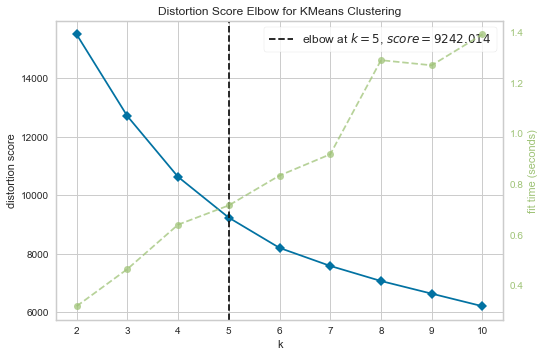

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [118]:
# Elbow methode

kmeans_visualizer = Pipeline([
    ("preprocessor_sans_categories", preprocessor_sans_categories),
    ("kelbowvisualizer_sans_categories", KElbowVisualizer(KMeans(),K=(4,12)))])
kmeans_visualizer.fit(data_sans_categories)
kmeans_visualizer.named_steps['kelbowvisualizer_sans_categories'].show()

On peut observer que le « coude » est le chiffre 5 qui est optimal pour ce cas. Nous pouvons maintenant exécuter un K-Means en utilisant comme n_clusters le nombre 5.

In [119]:
kmeanModel_sans_categories = KMeans(n_clusters=5)
kmeanModel_sans_categories.fit(X_scaled)

KMeans(n_clusters=5)

### Coefficient de silhouette

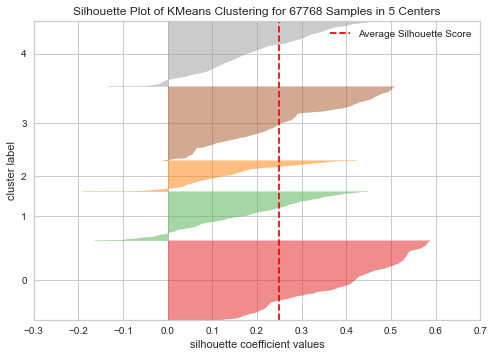

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 67768 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [120]:
K_sans_categories = kmeans_visualizer.named_steps['kelbowvisualizer_sans_categories'].elbow_value_

silhouette_visualizer = Pipeline([
    ("preprocessor_sans_categories", preprocessor_sans_categories),
    ("silhouettevisualizer_sans_categories", SilhouetteVisualizer(KMeans(K_sans_categories)))])
silhouette_visualizer.fit(data_sans_categories)
silhouette_visualizer.named_steps['silhouettevisualizer_sans_categories'].show()

Il y a quelques sous clusters qui sont mal classés. 

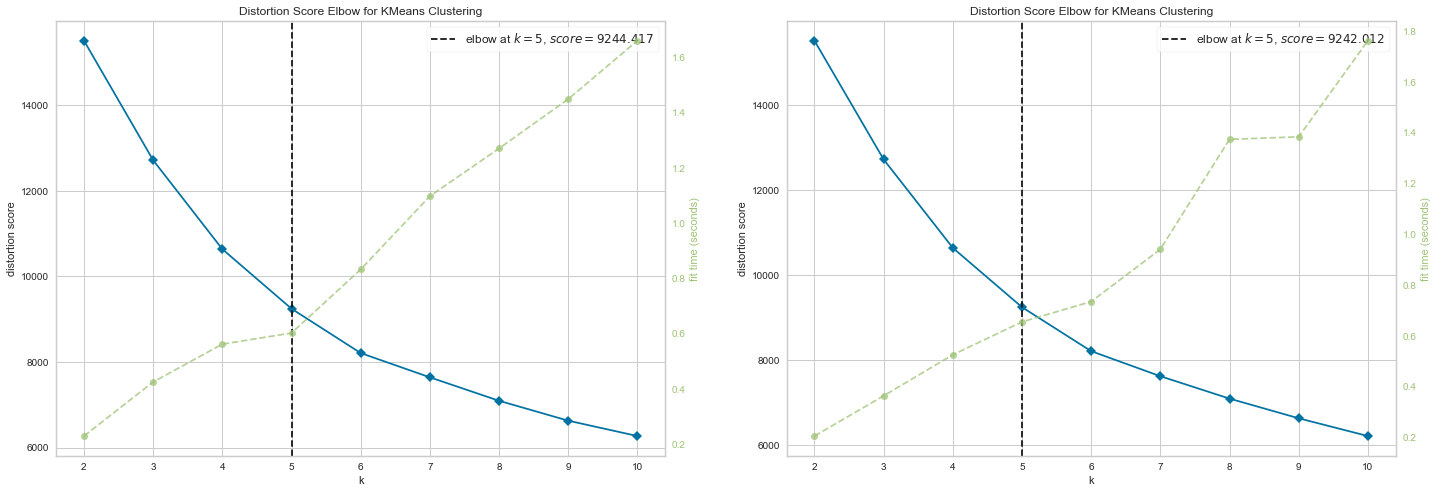

In [121]:
# Elbow method with differents metrics
metrics_sans_categories = ["silhouette_sans_categories", "calinski_harabasz_sans_categories"]
i = 0

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(24,8))
for m in metrics_sans_categories:
    kmeans_visualizer = Pipeline([
        ("preprocessor_sans_categories", preprocessor_sans_categories),
        ("kelbowvisualizer_sans_categories", KElbowVisualizer(KMeans(),
                                              K_sans_categories=(4,10),
                                              metric_sans_categories=m,
                                              ax=axes[i]))])
    kmeans_visualizer.fit(data_sans_categories)
    kmeans_visualizer.named_steps['kelbowvisualizer_sans_categories'].finalize()
    i+=1

plt.show()

### Distance intercluster

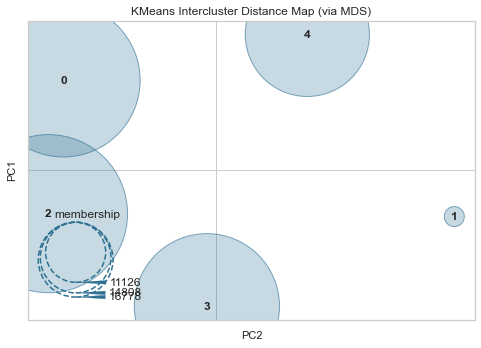

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [122]:
# Intercluster distance Map with best k
distance_visualizer_sans_categories = Pipeline([
    ("preprocessor_sans_categories", preprocessor_sans_categories),
    ("distancevisualizer_sans_categories", InterclusterDistance(KMeans(K_sans_categories)))])
distance_visualizer_sans_categories.fit(data_sans_categories)
distance_visualizer_sans_categories.named_steps['distancevisualizer_sans_categories'].show()

Les clusters 0 et 2 ne sont pas bien séparés.

### Analyse des différents clusters

In [123]:
kmeans_model_sans_categories = Pipeline([("preprocessor_sans_categories", preprocessor_sans_categories),
                         ("kmeans_sans_categories", KMeans(K_sans_categories))])
kmeans_model_sans_categories.fit(data_sans_categories)

kmeans_labels_sans_categories = kmeans_model_sans_categories.named_steps['kmeans_sans_categories'].labels_
data_sans_categories["kmeans_label_sans_categories"] = kmeans_labels_sans_categories

In [124]:
X_scaled_sans_categories = pd.DataFrame(data_sans_categories, index=data_sans_categories.index, columns=data_sans_categories.columns)
X_scaled_sans_categories["kmeans_label_sans_categories"] = kmeans_labels_sans_categories
X_scaled_clusters_sans_categories = X_scaled_sans_categories.groupby("kmeans_label_sans_categories").mean()
X_scaled_clusters_sans_categories

distance_haversine  payment_installments  \
kmeans_label_sans_categories                                             
0                                     451.752355              1.335013   
1                                     499.045921              1.728051   
2                                     847.720338              1.566232   
3                                     482.851575              4.109012   
4                                     354.319437              1.315844   

                                 score  delai_de_livraison  \
kmeans_label_sans_categories                                 
0                             4.624298            8.986781   
1                             2.646931           12.091424   
2                             4.685082           11.088057   
3                             4.634257            9.140163   
4                             4.772749            8.111803   

                              mois_commande_le_plus_frequent  \
kmeans_label_sans_categories                                   
0                                                   9.831040   
1                                                   5.131621   
2                                                   4.959303   
3                                                   6.445944   
4                                                   3.970284   

                              ratio_frais_de_port  prix_depense_en_tout  
kmeans_label_sans_categories                                             
0                                        0.312044            135.321963  
1                                        0.327561            167.296279  
2                                        0.366241            146.351146  
3                                        0.251775            172.575738  
4                                        0.304223            133.385459

Projetons à présent ces différentes moyennes sur un Radar plot avec la librairie Ploty pour visualiser les différences entre cluster :

In [125]:
plot_radars(data=X_scaled_clusters_sans_categories,
            group="kmeans_label_sans_categories")

Groupe 0 : sont les clients qui commandent en fin d'année avec une très petite distance du siège d'Olist. Ils payent de petites sommes. Ils sont satisfaits et notent très bien Olist (environ 5). Le delai de livraison est plutôt court.  

Groupe 1 : sont les clients qui commandent en début d'année avec une petite distance du siège de Olist. Ils payent pour des grosses sommes(0.865 par rapport à la dépense maximale) en une fois . Le ratio_frais_de_port un peu élevé. Leur note pour Olist est proche de 0. Le delai_de_livraison est le délai maximum.

Groupe 2 : sont les clients qui commandent plutôt en début d'année avec une  distance du siège de Olist maximale. Ils payent pour de petites sommes (0.33 de la dépense maximale) en une fois. Le ratio_frais_de_port est de 1. Leur note pour Olist de 5. Le delai_de_livraison est de 0.75 par rapport au délai maximum.

Groupe 3 : sont les clients qui commandent en début d'année avec une petite distance du siège de Olist. Ils payent pour des sommes maximales avec le nombre de paiements maximum autorisé. Le ratio_frais_de_port est bas. Leur note pour Olist est proche de 5. Le delai_de_livraison est assez bas.

Groupe 4 : sont les clients qui commandent en début d'année avec une très petite distance du siège de Olist ( quasiment nul). Ils payent de très petites sommes sur Olist en une fois. Le ratio_frais_de_port est de 0.45. Leur note pour Olist est de 5. Le delai_de_livraison est proche de 0.

## Stabilité à l'initialisation du K-Means

Nous voulons voir si notre modèle est stable. Nous allons entraîner plusieurs fois le modèle sans RandomState.

In [126]:
data_sans_categories.shape

(67768, 8)

In [128]:
n_comp_sans_categories = 8
pca_sans_categories = decomposition.PCA(n_components=n_comp_sans_categories)
pca_sans_categories.fit(X_scaled_sans_categories)
X_projected_sans_categories = pca_sans_categories.transform(X_scaled_sans_categories)
labels = kmeans_labels_sans_categories
pca_data = X_projected_sans_categories[:,:4]

In [129]:
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score

def bench_k_means(model, name, data, labels):
    t0 = time.time()
    estimator = make_pipeline(MinMaxScaler(), model).fit(data)
    fit_time = time.time() - t0
    results = [name, fit_time, estimator[1].inertia_]
    
    # Tester différentes métriques sur les labels pred
    clustering_metrics = [
        homogeneity_score,
        adjusted_rand_score,
        adjusted_mutual_info_score]
    results += [m(labels, estimator[1].labels_) for m in clustering_metrics]
    
    # Show the results
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [130]:
print("Scores de stabilité à l'initialisation")
print(53 * '_')
print('Iteration\tFitTime\tInertia\tHomo\tARI\tAMI')
print(53 * '_')

for i in range(10):
    imodel = KMeans(n_clusters=K_sans_categories, n_init=1, init="k-means++")
    bench_k_means(imodel,"Iter "+str(i), pca_data, labels)

print(53 * '_')

Scores de stabilité à l'initialisation
_____________________________________________________
Iteration	FitTime	Inertia	Homo	ARI	AMI
_____________________________________________________
Iter 0   	0.103s	2233	0.428	0.424	0.440
Iter 1   	0.070s	2303	0.461	0.469	0.473
Iter 2   	0.096s	2233	0.428	0.424	0.440
Iter 3   	0.086s	2156	0.449	0.383	0.442
Iter 4   	0.070s	2164	0.407	0.353	0.405
Iter 5   	0.077s	2307	0.461	0.480	0.475
Iter 6   	0.088s	2305	0.438	0.454	0.448
Iter 7   	0.076s	2156	0.449	0.383	0.442
Iter 8   	0.072s	2164	0.407	0.353	0.405
Iter 9   	0.071s	2233	0.428	0.424	0.440
_____________________________________________________


# Enregistrement des données. 

In [131]:
from pickle import *
f = open("k","wb")
k = K
dump(k,f)
f.close()